# **COVID-19 Death Rate**

**Udacity Data Scientist Nanodegree Program**<br/>
Project "Write a Data Science Blog Post"<br/>
by Juliano Oliveira | July 12, 2021

### **Project links**

GitHub: https://github.com/datacgi/covid-19-death-rate

Medium: https://datacgi.medium.com/five-aspects-affecting-covid-19-death-rate-9f5758a62ef1

### Methodology

This study is divided in 5 sections, following the CRISP-DM Process (Cross Industry Process for Data Mining): 1. Business Understanding, 2. Data Understanding, 3. Prepare Data, 4. Data Modeling, 5. Evaluate the Results, and 6. Deploy.

# **1. Business Understanding**

This project originated from the Udacity's Nanodregree Data Science Program, to attend the activity "Write a Data Science Blog Post".

The Coronavirus Disease (COVID-19) pandemic took the world by surprise and, despite the advances we have made in dealing with the virus, we still have a lot to learn. However, since last year, the world has produced countless data that can help us understand what is happening and why.

This study aims to apply Data Science techniques to understand the different mortality rates caused by COVID-19 at a global level, based on the five aspects that affect its lethality: economy, corruption, education, health, and government regime.

The proposal is to explain the following issues:<br/>

1. **Economic:** Do richer countries perform better against the virus than emerging ones?<br/>
2. **Corruption:** Do the most corrupt countries have more deaths?<br/>
3. **Health:** Are countries with the most investments in health coping better with the pandemic?<br/>
4. **Education:** Does the quality of education interfere with the death rate?<br/>
5. **Government:** Is democracy more prepared to save lives than authoritarian regimes?

# **2: Data Understanding**

**Data Source**

1. Coronavirus (COVID-19) Deaths (Our World in Data): https://ourworldindata.org/covid-deaths/
2. Gross domestic product — GDP (The World Bank): https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
3. Corruption Perception Index 2020 (Transparency International): https://www.transparency.org/en/cpi/2020/index/bra
4. Education Index (Human Development Reports): http://hdr.undp.org/en/indicators/103706
5. The 2021 STC Health Index (Hudson's Global Residence Index): https://globalresidenceindex.com/hnwi-index/health-index/
6. Democracy Index 2020 (The Economist Intelligence Unit): https://www.eiu.com/n/campaigns/democracy-index-2020/
7. Graphics Labels and Titles

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.text as text
import matplotlib as mpl
from cycler import cycler
plt.style.use('ggplot')
data = np.random.randn(50)

**Plot Style**

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
plt.style.use('seaborn-notebook')

**Labels and Titles Style**

In [4]:
plt.rcParams['figure.figsize'] = (14.22,8)
plt.rcParams['axes.titlesize'] = (16)
plt.rcParams['axes.labelsize'] = (16)
plt.rcParams['axes.titleweight'] = ("bold")

**Function of the Labels and Titles**

In [5]:
def lbt(xlabel, ylabel, title = None):
    """
    This function sets the x and y labels and the graph title
    INPUT:  xlabel (str): x-axis label text
            ylabel (str): y-axis label text
            title  (str): graphs title text
    OUTPUT: None
    """
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if title:
        plt.title(title)

**Spearman's Correlation Functions**

In [6]:
from scipy.stats import spearmanr

In [7]:
def spm(a, b):
    """
    This function classifies Spearman's correlation into "None", "Weak", "Moderate" or "Strong"
    INPUT:  spm (str): 'column name 1', 'column name 2'
    OUTPUT: (float): 'spearman correlation result'
            (str): "Correlation: None", "Correlation: Weak", "Correlation: Moderate", "Correlation: Strong", "Negative Correlation: Weak", "Negative Correlation: Moderate" or "Negative Correlation: Strong". 
    """
    spm_result = spearmanr(df[a], df[b]).correlation
    if spm_result >= 0 and spm_result < 0.3:
        print(spm_result)
        print('Correlation: None')
    elif spm_result >= 0.1 and spm_result < 0.3:
        print(spm_result)
        print('Correlation: Weak')
    elif spm_result >= 0.3 and spm_result < 0.5:
        print(spm_result)
        print('Correlation: Moderate')
    elif spm_result >= 0.5:
        print(spm_result)
        print('Correlation: Strong')
    elif spm_result < 0 and spm_result > -0.3:
        print(spm_result)
        print('Negative Correlation: Weak')
    elif spm_result <= -0.3 and spm_result > -0.5:
        print(spm_result)
        print('Negative Correlation: Moderate')
    elif spm_result <= -0.5:
        print(spm_result)
        print('Negative Correlation: Strong')

In [8]:
def spm_equal(a, b, c, d, e, f):
    """
    This function classifies Spearman's correlation into "None", "Weak", "Moderate" or "Strong"
    INPUT:  spm (str): 'column name 1', 'repeated item from column name 1', 'column name 2', 'column name 3', 'repeated item from column name 3', 'column name 4'
    OUTPUT: (float): 'spearman correlation result'
            (str): "Correlation: None", "Correlation: Weak", "Correlation: Moderate", "Correlation: Strong", "Negative Correlation: Weak", "Negative Correlation: Moderate" or "Negative Correlation: Strong". 
    """
    spm_result = spearmanr(df[df[a] == b][c], df[df[d] == e][f]).correlation
    if spm_result >= 0 and spm_result < 0.3:
        print(spm_result)
        print('Correlation: None')
    elif spm_result >= 0.1 and spm_result < 0.3:
        print(spm_result)
        print('Correlation: Weak')
    elif spm_result >= 0.3 and spm_result < 0.5:
        print(spm_result)
        print('Correlation: Moderate')
    elif spm_result >= 0.5:
        print(spm_result)
        print('Correlation: Strong')
    elif spm_result < 0 and spm_result > -0.3:
        print(spm_result)
        print('Negative Correlation: Weak')
    elif spm_result <= -0.3 and spm_result > -0.5:
        print(spm_result)
        print('Negative Correlation: Moderate')
    elif spm_result <= -0.5:
        print(spm_result)
        print('Negative Correlation: Strong')

In [9]:
def spm25(a, b, c, d):
    """
    This function classifies Spearman's correlation into "None", "Weak", "Moderate" or "Strong"
    INPUT:  spm (str): 'dataframe', 'column name 1', 'dataframe', 'column name 2'
    OUTPUT: (float): 'spearman correlation result'
            (str): "Correlation: None", "Correlation: Weak", "Correlation: Moderate", "Correlation: Strong", "Negative Correlation: Weak", "Negative Correlation: Moderate" or "Negative Correlation: Strong". 
    """
    spm_result = spearmanr(df[df[a]<25][b], df[df[c]<25][d]).correlation
    if spm_result >= 0 and spm_result < 0.3:
        print(spm_result)
        print('Correlation: None')
    elif spm_result >= 0.1 and spm_result < 0.3:
        print(spm_result)
        print('Correlation: Weak')
    elif spm_result >= 0.3 and spm_result < 0.5:
        print(spm_result)
        print('Correlation: Moderate')
    elif spm_result >= 0.5:
        print(spm_result)
        print('Correlation: Strong')
    elif spm_result < 0 and spm_result > -0.3:
        print(spm_result)
        print('Negative Correlation: Weak')
    elif spm_result <= -0.3 and spm_result > -0.5:
        print(spm_result)
        print('Negative Correlation: Moderate')
    elif spm_result <= -0.5:
        print(spm_result)
        print('Negative Correlation: Strong')

**Reading the Files (.csv)**

In [10]:
df = pd.read_csv("covid.csv", encoding = 'utf8', parse_dates=True)
df_gdp = pd.read_csv("gdp.csv", encoding = 'utf8', sep=",")
df_cpi = pd.read_csv("cpi.csv", encoding = 'utf8', sep=";")
df_edu = pd.read_csv("edu.csv", encoding = 'utf8', sep=";")
df_health = pd.read_csv("health.csv", encoding = 'utf8', sep=";")
df_demo = pd.read_csv("demo.csv", encoding = 'utf8', sep=";")

## df

In [11]:
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


**Identify Missing Values**

In [12]:
np.sum(df.isnull())
#or df.isnull().sum()

iso_code                                      0
continent                                  4750
location                                      0
date                                          0
total_cases                                3757
new_cases                                  3760
new_cases_smoothed                         4770
total_deaths                              13952
new_deaths                                13796
new_deaths_smoothed                        4770
total_cases_per_million                    4277
new_cases_per_million                      4280
new_cases_smoothed_per_million             5285
total_deaths_per_million                  14459
new_deaths_per_million                    14303
new_deaths_smoothed_per_million            5285
reproduction_rate                         19690
icu_patients                              91301
icu_patients_per_million                  91301
hosp_patients                             88822
hosp_patients_per_million               

In [13]:
np.sum(df.isnull()) == 0

iso_code                                  True
continent                                False
location                                  True
date                                      True
total_cases                              False
new_cases                                False
new_cases_smoothed                       False
total_deaths                             False
new_deaths                               False
new_deaths_smoothed                      False
total_cases_per_million                  False
new_cases_per_million                    False
new_cases_smoothed_per_million           False
total_deaths_per_million                 False
new_deaths_per_million                   False
new_deaths_smoothed_per_million          False
reproduction_rate                        False
icu_patients                             False
icu_patients_per_million                 False
hosp_patients                            False
hosp_patients_per_million                False
weekly_icu_ad

In [14]:
df.columns[np.sum(df.isnull()) == 0]

Index(['iso_code', 'location', 'date'], dtype='object')

In [15]:
no_nulls = set(df.columns[np.sum(df.isnull()) == 0])

In [16]:
no_nulls

{'date', 'iso_code', 'location'}

**Creating the df Table with the Chosen Columns**

In [17]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101542,ZWE,Africa,Zimbabwe,2021-07-06,57963.0,1949.0,1347.143,1939.0,28.0,25.429,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101543,ZWE,Africa,Zimbabwe,2021-07-07,60227.0,2264.0,1480.429,1973.0,34.0,26.286,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101544,ZWE,Africa,Zimbabwe,2021-07-08,62383.0,2156.0,1594.571,2029.0,56.0,31.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101545,ZWE,Africa,Zimbabwe,2021-07-09,65066.0,2683.0,1771.857,2084.0,55.0,34.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [18]:
df = df[['location','date','total_deaths_per_million', 'total_deaths', 'total_vaccinations']]

In [19]:
df = df[df['date'] == '2021-07-10'].drop(columns=['date'])

In [20]:
df_v = df[['location','total_deaths_per_million', 'total_deaths', 'total_vaccinations']]

In [21]:
df = df_v[['location','total_deaths_per_million','total_deaths']]

In [22]:
df

,location,total_deaths_per_million,total_deaths
502,Afghanistan,142.852,5561.0
1016,Africa,112.767,151175.0
1518,Albania,853.430,2456.0
2020,Algeria,87.204,3824.0
2516,Andorra,1643.694,127.0
...,...,...,...
99489,Vietnam,1.151,112.0
100131,World,516.370,4024998.0
100588,Yemen,45.799,1366.0
101068,Zambia,150.947,2775.0


**Total Vaccinations**

In [23]:
vaccinations = df_v[['location', 'total_vaccinations']]
vaccinations

,location,total_vaccinations
502,Afghanistan,NaN
1016,Africa,5.526079e+07
1518,Albania,NaN
2020,Algeria,NaN
2516,Andorra,NaN
...,...,...
99489,Vietnam,4.040783e+06
100131,World,3.416511e+09
100588,Yemen,NaN
101068,Zambia,1.812190e+05


In [24]:
np.sum(vaccinations.isnull())

location                0
total_vaccinations    148
dtype: int64

## **df2020**

**Deaths from the End of 2020**

In [25]:
df2020 = pd.read_csv("covid.csv", encoding = 'utf8', parse_dates=True)

In [26]:
df2020 = df2020[['location','date','total_deaths_per_million', 'total_deaths']]

In [27]:
df2020 = df2020[df2020['date'] == '2020-12-31'].drop(columns=['date'])

In [28]:
df2020 = df2020[['location','total_deaths_per_million', 'total_deaths']]

In [29]:
df2020

,location,total_deaths_per_million,total_deaths
311,Afghanistan,56.283,2191.0
825,Africa,48.835,65468.0
1327,Albania,410.383,1181.0
1829,Algeria,62.849,2756.0
2325,Andorra,1087.168,84.0
...,...,...,...
99298,Vietnam,0.360,35.0
99940,World,241.238,1880405.0
100397,Yemen,20.452,610.0
100877,Zambia,21.105,388.0


## df2021

**Only 2021 Deaths (Difference between df and df2020)**

In [30]:
df_death = df.merge(df2020, how = 'inner', left_on = 'location', right_on = 'location')

In [31]:
df_death['deaths_2021'] = df_death['total_deaths_per_million_x'] - df_death['total_deaths_per_million_y']
df_death['total_deaths_2021'] = df_death['total_deaths_x'] - df_death['total_deaths_y']

In [32]:
df_death = df_death.drop(columns=['total_deaths_per_million_x', 'total_deaths_per_million_y'])
df_death = df_death.drop(columns=['total_deaths_x', 'total_deaths_y'])

In [33]:
df_death

,location,deaths_2021,total_deaths_2021
0,Afghanistan,86.569,3370.0
1,Africa,63.932,85707.0
2,Albania,443.047,1275.0
3,Algeria,24.355,1068.0
4,Andorra,556.526,43.0
...,...,...,...
194,Vietnam,0.791,77.0
195,World,275.132,2144593.0
196,Yemen,25.347,756.0
197,Zambia,129.842,2387.0


In [34]:
#Column titles
df.columns

Index(['location', 'total_deaths_per_million', 'total_deaths'], dtype='object')

In [35]:
#Statistical summary of the DataFrame, with quartiles, median, etc.
df.describe()

,total_deaths_per_million,total_deaths
count,193.000000,1.940000e+02
mean,699.134228,6.606386e+04
std,863.602327,3.281348e+05
min,0.352000,1.000000e+00
25%,45.799000,2.227500e+02
50%,320.806000,2.111000e+03
75%,1173.443000,1.085425e+04
max,5860.454000,4.024998e+06


**Total Deaths and Vaccination Graphs**

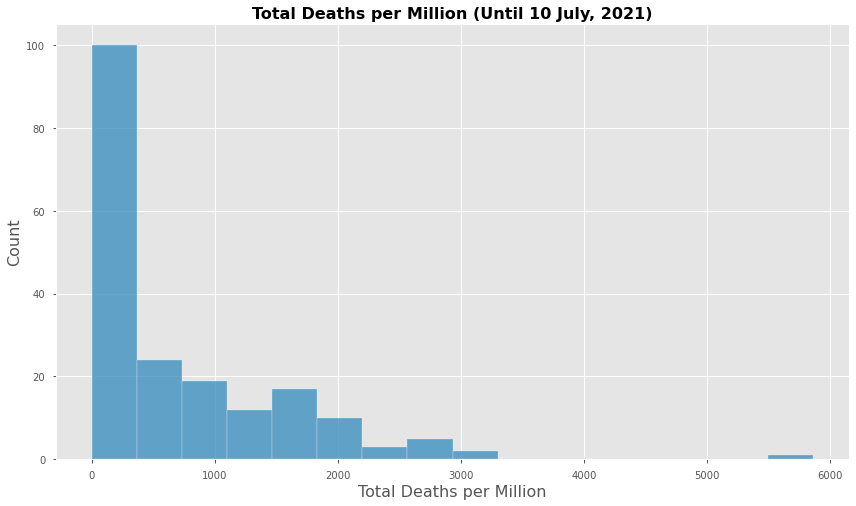

In [36]:
sns.histplot(data=df, x="total_deaths_per_million")
lbt("Total Deaths per Million", "Count", "Total Deaths per Million (Until 10 July, 2021)")

There are more countries with total deaths per million below 1k.

In [37]:
deaths_desc = df.sort_values('total_deaths_per_million', ascending = False)

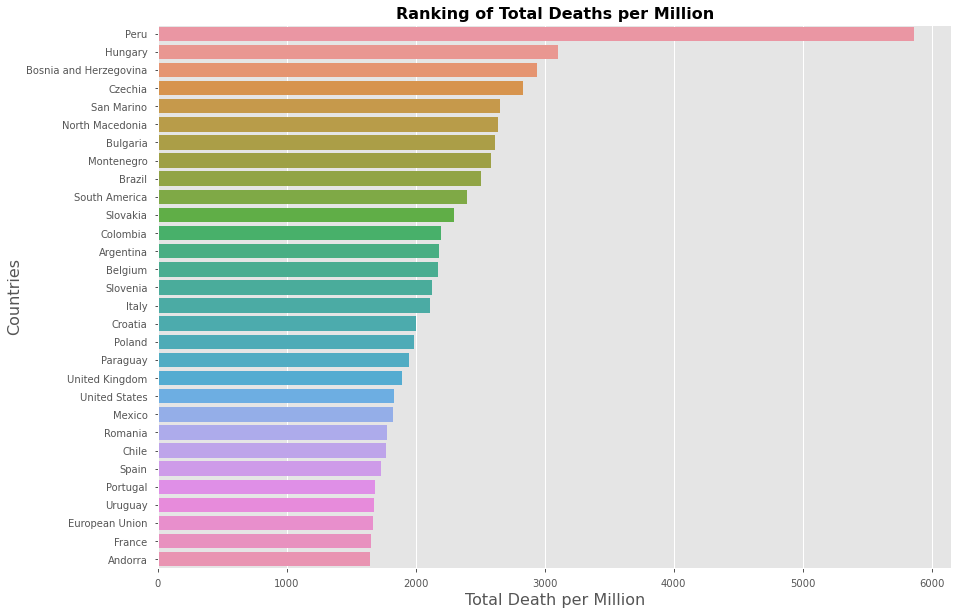

In [38]:
plt.figure(figsize=(14.22, 10))
sns.barplot(x = 'total_deaths_per_million', y = 'location', data = deaths_desc[:30])
lbt("Total Death per Million", "Countries", "Ranking of Total Deaths per Million")

In [39]:
deaths_total_desc = df.sort_values('total_deaths', ascending = False)

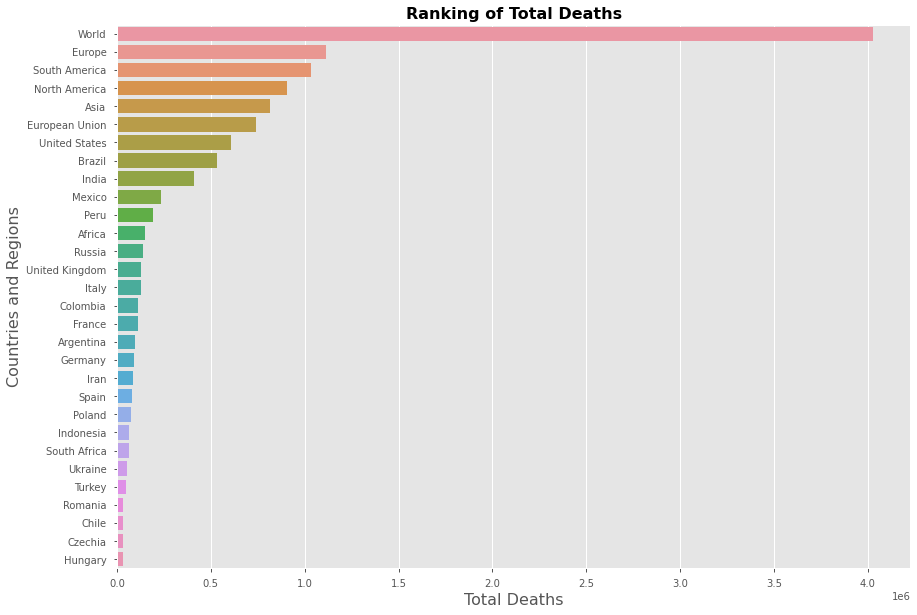

In [40]:
plt.figure(figsize=(14.22, 10))
sns.barplot(x = 'total_deaths', y = 'location', data = deaths_total_desc[:30])
lbt("Total Deaths", "Countries and Regions", "Ranking of Total Deaths")

Brazil and the USA together have more deaths than the EU, about a quarter of the deaths in the world.

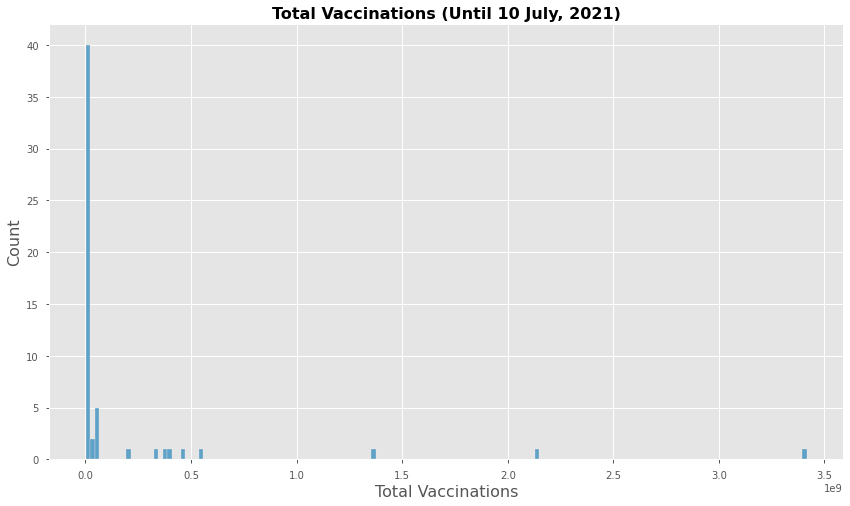

In [41]:
sns.histplot(data=vaccinations, x="total_vaccinations")
lbt("Total Vaccinations", "Count", "Total Vaccinations (Until 10 July, 2021)")

In [42]:
vaccinations_desc = vaccinations.sort_values('total_vaccinations', ascending = False)

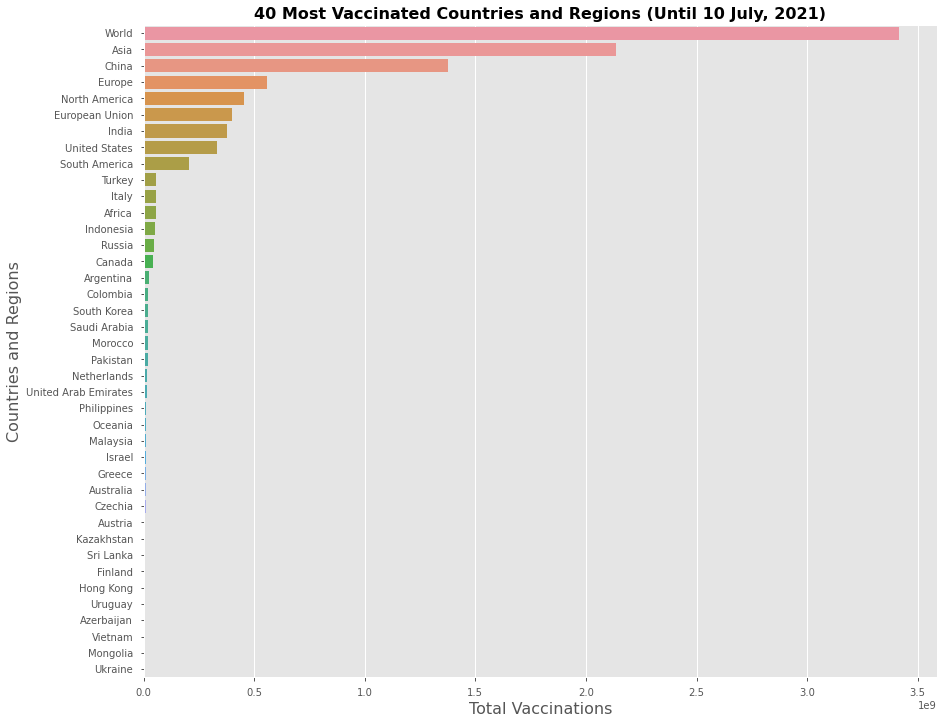

In [43]:
plt.figure(figsize=(14.22, 12))
sns.barplot(x = 'total_vaccinations', y = 'location', data = vaccinations_desc[:40])
lbt("Total Vaccinations", "Countries and Regions", "40 Most Vaccinated Countries and Regions (Until 10 July, 2021)")

Immunizations are poorly distributed in the world, concentrated in China, the EU, India, and the USA.

# 3. Prepare Data

### GDP

In [44]:
df_gdp.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.670151e+10,1.748822e+10,1.853584e+10,2.007325e+10,2.186583e+10,2.396287e+10,...,9.131974e+11,9.276555e+11,9.563187e+11,8.930997e+11,8.547519e+11,9.622690e+11,9.840320e+11,9.778092e+11,8.984741e+11,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,1.980707e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040732e+10,1.113130e+10,1.194684e+10,1.268022e+10,1.384262e+10,1.486682e+10,...,7.169352e+11,8.078189e+11,8.469431e+11,7.574921e+11,6.874847e+11,6.809891e+11,7.381313e+11,7.920789e+11,7.865850e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,6.230691e+10,NaN


In [45]:
np.sum(df_gdp.isnull())

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              161
                 ... 
2017               12
2018               12
2019               19
2020               43
Unnamed: 65       266
Length: 66, dtype: int64

In [46]:
df_gdp['Indicator Name'].unique()
df_gdp['Indicator Code'].unique()

array(['NY.GDP.MKTP.CD'], dtype=object)

In [47]:
df_gdp.count()

Country Name      266
Country Code      266
Indicator Name    266
Indicator Code    266
1960              105
                 ... 
2017              254
2018              254
2019              247
2020              223
Unnamed: 65         0
Length: 66, dtype: int64

In [48]:
columns_name = ['Country Name','Country Code','2020']
df_gdp = df_gdp[['Country Name','Country Code','2020']]

In [49]:
df_gdp = df_gdp[~df_gdp['2020'].isna()]

In [50]:
df_gdp = df_gdp.rename(columns={'2020':'GDP'})

In [51]:
df_gdp = df_gdp[['Country Name','GDP']]

In [52]:
df_gdp = df_gdp.sort_values('GDP',ascending=False)

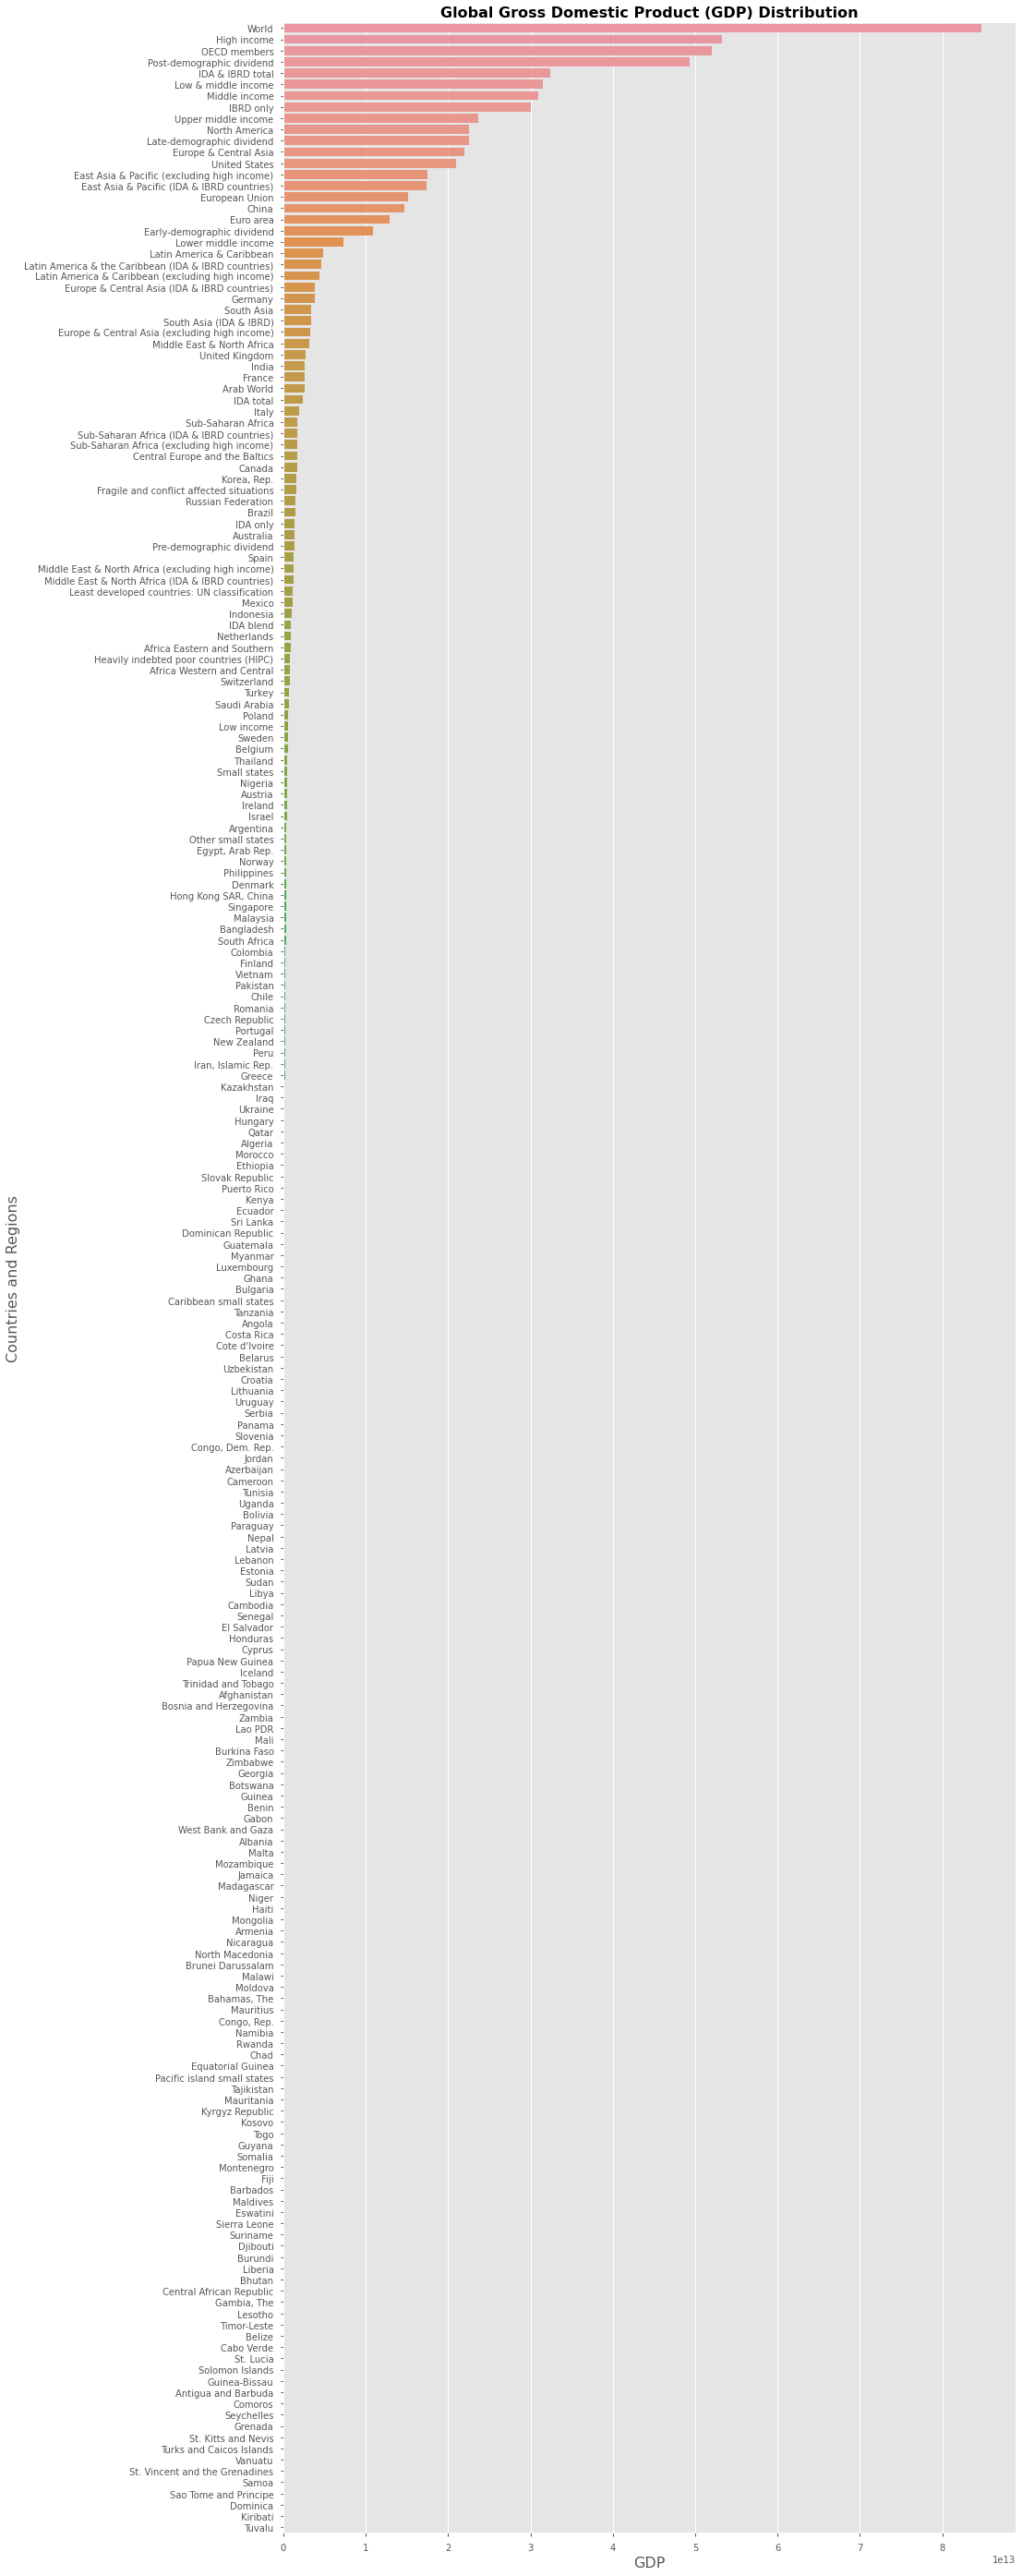

In [53]:
plt.figure(figsize=(14.22, 50))
sns.barplot(x = 'GDP', y = 'Country Name', data = df_gdp[:])
lbt("GDP", "Countries and Regions", "Global Gross Domestic Product (GDP) Distribution")

Wealth is also poorly distributed in the world, concentrated with the same group that had more vaccinations.

### Corruption

In [54]:
df_cpi

,Country,ISO3,Region,CPI score 2020,Rank 2020,Sources 2020,Standard error 2020,CPI score 2019,Rank 2019,Sources 2019,...,Standard error 2015,CPI score 2014,Sources 2014,Standard error 2014,CPI Score 2013,Sources 2013,Standard error 2013,CPI Score 2012,Sources 2012,Standard error 2012
0,Denmark,DNK,WE/EU,88,1,8,"1,78",87,1,8,...,"2,16",92.0,7.0,"2,04",91.0,7.0,"2,2",90.0,7.0,2
1,New Zealand,NZL,AP,88,1,8,"1,48",87,1,8,...,"2,32",91.0,7.0,"2,28",91.0,7.0,"2,3",90.0,7.0,"2,2"
2,Finland,FIN,WE/EU,85,3,8,"1,75",86,3,8,...,"1,77",89.0,7.0,"2,05",89.0,7.0,"1,7",90.0,7.0,3
3,Singapore,SGP,AP,85,3,9,"1,2",85,4,9,...,"2,02",84.0,8.0,"1,75",86.0,9.0,"2,3",87.0,9.0,"2,1"
4,Sweden,SWE,WE/EU,85,3,8,"1,3",85,4,8,...,"1,71",87.0,7.0,"3,41",89.0,7.0,"2,3",88.0,7.0,"1,9"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,VEN,AME,15,176,8,"0,91",16,173,8,...,"2,64",19.0,7.0,"1,69",20.0,7.0,"2,3",19.0,7.0,"2,1"
176,Yemen,YEM,MENA,15,176,7,"1,33",15,177,7,...,"2,66",19.0,6.0,"2,37",18.0,6.0,"2,6",23.0,6.0,"2,2"
177,Syria,SYR,MENA,14,178,5,"1,58",13,178,5,...,"5,66",20.0,4.0,"5,31",17.0,4.0,"3,8",26.0,5.0,"2,7"
178,Somalia,SOM,SSA,12,179,6,"2,29",9,180,5,...,"2,32",8.0,4.0,"2,34",8.0,4.0,"1,9",8.0,4.0,"2,3"


In [55]:
np.sum(df_cpi.isnull())

Country                 0
ISO3                    0
Region                  0
CPI score 2020          0
Rank 2020               0
Sources 2020            0
Standard error 2020     0
CPI score 2019          0
Rank 2019               0
Sources 2019            0
Standard error 2019     0
CPI score 2018          0
Rank 2018               0
Sources 2018            0
Standard error 2018     0
CPI score 2017          0
Rank 2017               0
Sources 2017            0
Standard error 2017     0
CPI score 2016          4
Sources 2016            4
Standard error 2016     4
CPI score 2015         12
Sources 2015           12
Standard error 2015    12
CPI score 2014          6
Sources 2014            6
Standard error 2014     6
CPI Score 2013          4
Sources 2013            4
Standard error 2013     4
CPI Score 2012          5
Sources 2012            5
Standard error 2012     5
dtype: int64

In [56]:
corruption_list = ["Country", "ISO3","CPI score 2020"]
df_cpi = df_cpi[corruption_list]
df_cpi[df_cpi['CPI score 2020'].isna()]

,Country,ISO3,CPI score 2020


In [57]:
corruption_list = ["Country","CPI score 2020"]
df_cpi = df_cpi[corruption_list]

In [58]:
df_cpi.head(5)

,Country,CPI score 2020
0,Denmark,88
1,New Zealand,88
2,Finland,85
3,Singapore,85
4,Sweden,85


In [59]:
df_asc = df_cpi.sort_values('CPI score 2020')

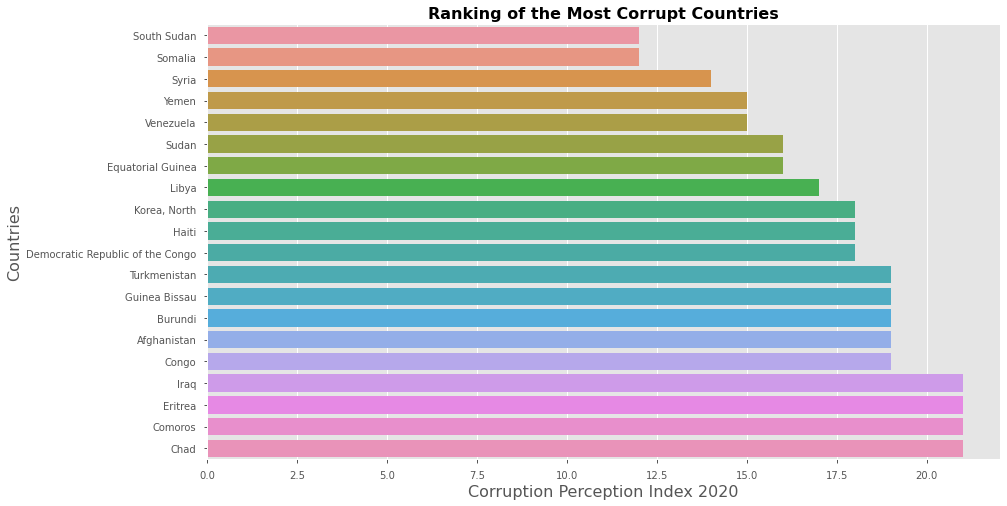

In [60]:
sns.barplot(x = 'CPI score 2020', y = 'Country', data = df_asc[:20])
lbt("Corruption Perception Index 2020", "Countries", "Ranking of the Most Corrupt Countries")

Note: the higher the CPI, the less corrupt the country.

In [61]:
df_asc = df_cpi.sort_values('CPI score 2020', ascending = False)

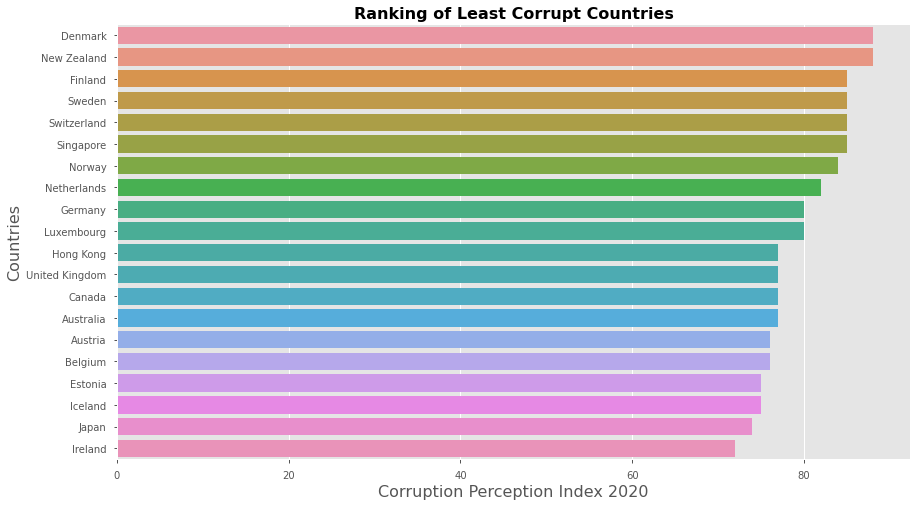

In [62]:
sns.barplot(x = 'CPI score 2020', y = 'Country', data = df_asc[:20])
lbt("Corruption Perception Index 2020", "Countries", "Ranking of Least Corrupt Countries")

Note: the higher the CPI, the less corrupt the country.

### Education

In [63]:
df_edu.head()

,HDI Rank,Country,1990,Unnamed: 3,1991,Unnamed: 5,1992,Unnamed: 7,1993,Unnamed: 9,...,2015,Unnamed: 53,2016,Unnamed: 55,2017,Unnamed: 57,2018,Unnamed: 59,2019,Unnamed: 61
0,169.0,Afghanistan,0.122,NaN,0.133,NaN,0.145,NaN,0.156,NaN,...,0.405,NaN,0.406,NaN,0.408,NaN,0.413,NaN,0.414,NaN
1,69.0,Albania,0.583,NaN,0.588,NaN,0.557,NaN,0.542,NaN,...,0.753,NaN,0.745,NaN,0.747,NaN,0.743,NaN,0.746,NaN
2,91.0,Algeria,0.385,NaN,0.395,NaN,0.405,NaN,0.414,NaN,...,0.659,NaN,0.660,NaN,0.665,NaN,0.668,NaN,0.672,NaN
3,36.0,Andorra,..,NaN,..,NaN,..,NaN,..,NaN,...,0.718,NaN,0.722,NaN,0.713,NaN,0.720,NaN,0.720,NaN
4,148.0,Angola,..,NaN,..,NaN,..,NaN,..,NaN,...,0.472,NaN,0.487,NaN,0.498,NaN,0.500,NaN,0.500,NaN


In [64]:
np.sum(df_edu.isnull())

HDI Rank        17
Country          0
1990             2
Unnamed: 3     206
1991             0
              ... 
Unnamed: 57    206
2018             0
Unnamed: 59    206
2019             0
Unnamed: 61    206
Length: 62, dtype: int64

In [65]:
df_edu.shape

(206, 62)

In [66]:
df_edu = df_edu[['Country','2019']]

In [67]:
df_edu

,Country,2019
0,Afghanistan,0.414
1,Albania,0.746
2,Algeria,0.672
3,Andorra,0.720
4,Angola,0.500
...,...,...
201,Sub-Saharan Africa,0.471
202,Least Developed Countries,0.437
203,Small Island Developing States,0.633
204,Organization for Economic Co-operation and Dev...,0.852


In [68]:
df_edu_desc_2019 = df_edu.sort_values('2019', ascending = False)

In [69]:
df_edu_desc_2019

,Country,2019
64,Germany,0.943
127,Norway,0.930
179,United Kingdom,0.928
59,Finland,0.927
122,New Zealand,0.926
...,...,...
106,Mali,0.286
54,Eritrea,0.269
124,Niger,0.249
195,Regions,..


In [70]:
df_edu_desc_2019.dtypes

Country    object
2019       object
dtype: object

In [71]:
df_edu_desc_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 64 to 189
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  206 non-null    object
 1   2019     206 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [72]:
df_edu_desc_2019['2019'] = pd.to_numeric(df_edu_desc_2019['2019'],errors = 'coerce')

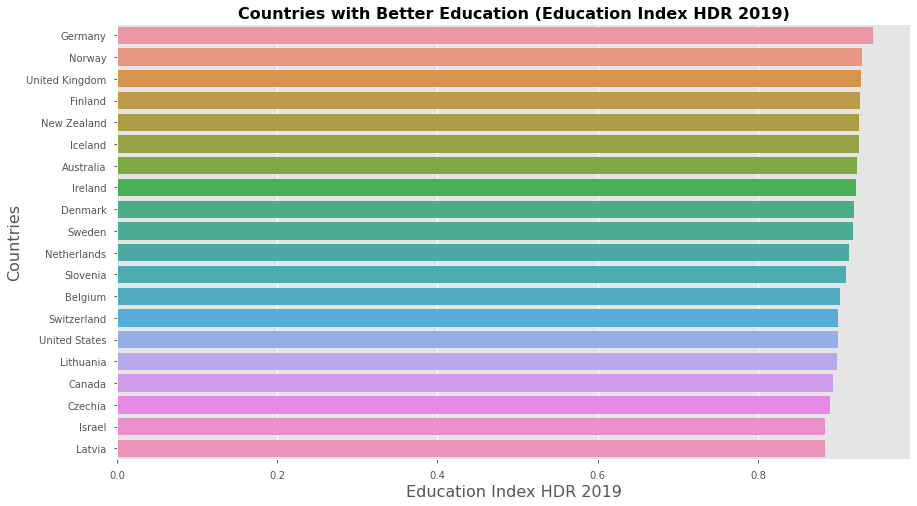

In [73]:
sns.barplot(x = '2019', y = 'Country', data = df_edu_desc_2019[:20])
lbt("Education Index HDR 2019", "Countries", "Countries with Better Education (Education Index HDR 2019)")

In [74]:
df_edu_asc_2019 = df_edu_desc_2019.sort_values('2019', ascending = True)

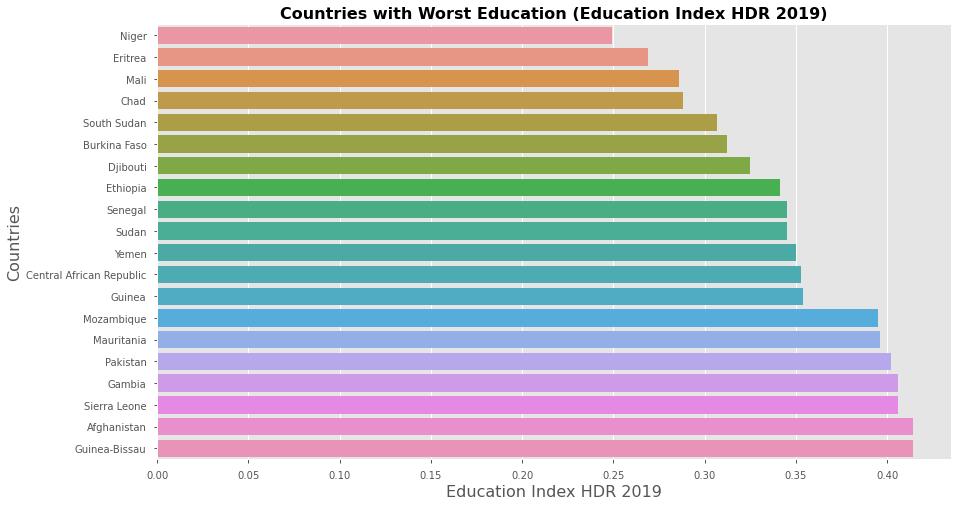

In [75]:
sns.barplot(x = '2019', y = 'Country', data = df_edu_asc_2019[:20])
lbt("Education Index HDR 2019", "Countries", "Countries with Worst Education (Education Index HDR 2019)")

### Health

In [76]:
df_health.head(5)

,RANK,COUNTRY,INDEX,Healthy life expectancy at birth (years),Maternal mortality ratio (per 100 000 live births),Proportion of births attended by skilled health personnel (%),Under-five mortality rate (per 1000 live births),"Probability of dying from any of CVD, cancer, diabetes, CRD between age 30 and ext age 70k (%)",Mortality rate attributed to household and ambient air pollution (per 100 000 population),Mortality rate attributed to exposure to unsafe WASH services (per 100 000 population),Mortality rate attributed to unintentional poisoning (per 100 000 population)
0,1,Monaco,1.00,90.00,NaN,NaN,3.5,NaN,NaN,NaN,NaN
1,2,Hong Kong,0.99,84.24,0.0,100.0,1.6,NaN,NaN,NaN,NaN
2,3,Australia,0.94,71.90,6.0,99.0,3.8,8.9,0.4,<0.1,0.5
3,4,Finland,0.93,71.00,3.0,100.0,2.3,10.1,6.0,0.2,0.6
4,4,Iceland,0.93,72.70,3.0,NaN,2.0,8.3,6.4,<0.1,0.7


In [77]:
df_health = df_health[['COUNTRY','INDEX']]

In [78]:
df_health

,COUNTRY,INDEX
0,Monaco,1.00
1,Hong Kong,0.99
2,Australia,0.94
3,Finland,0.93
4,Iceland,0.93
...,...,...
196,South Sudan,0.00
197,Central African Republic,0.00
198,Chad,0.00
199,Somalia,0.00


In [79]:
df_asc = df_health.sort_values('INDEX')

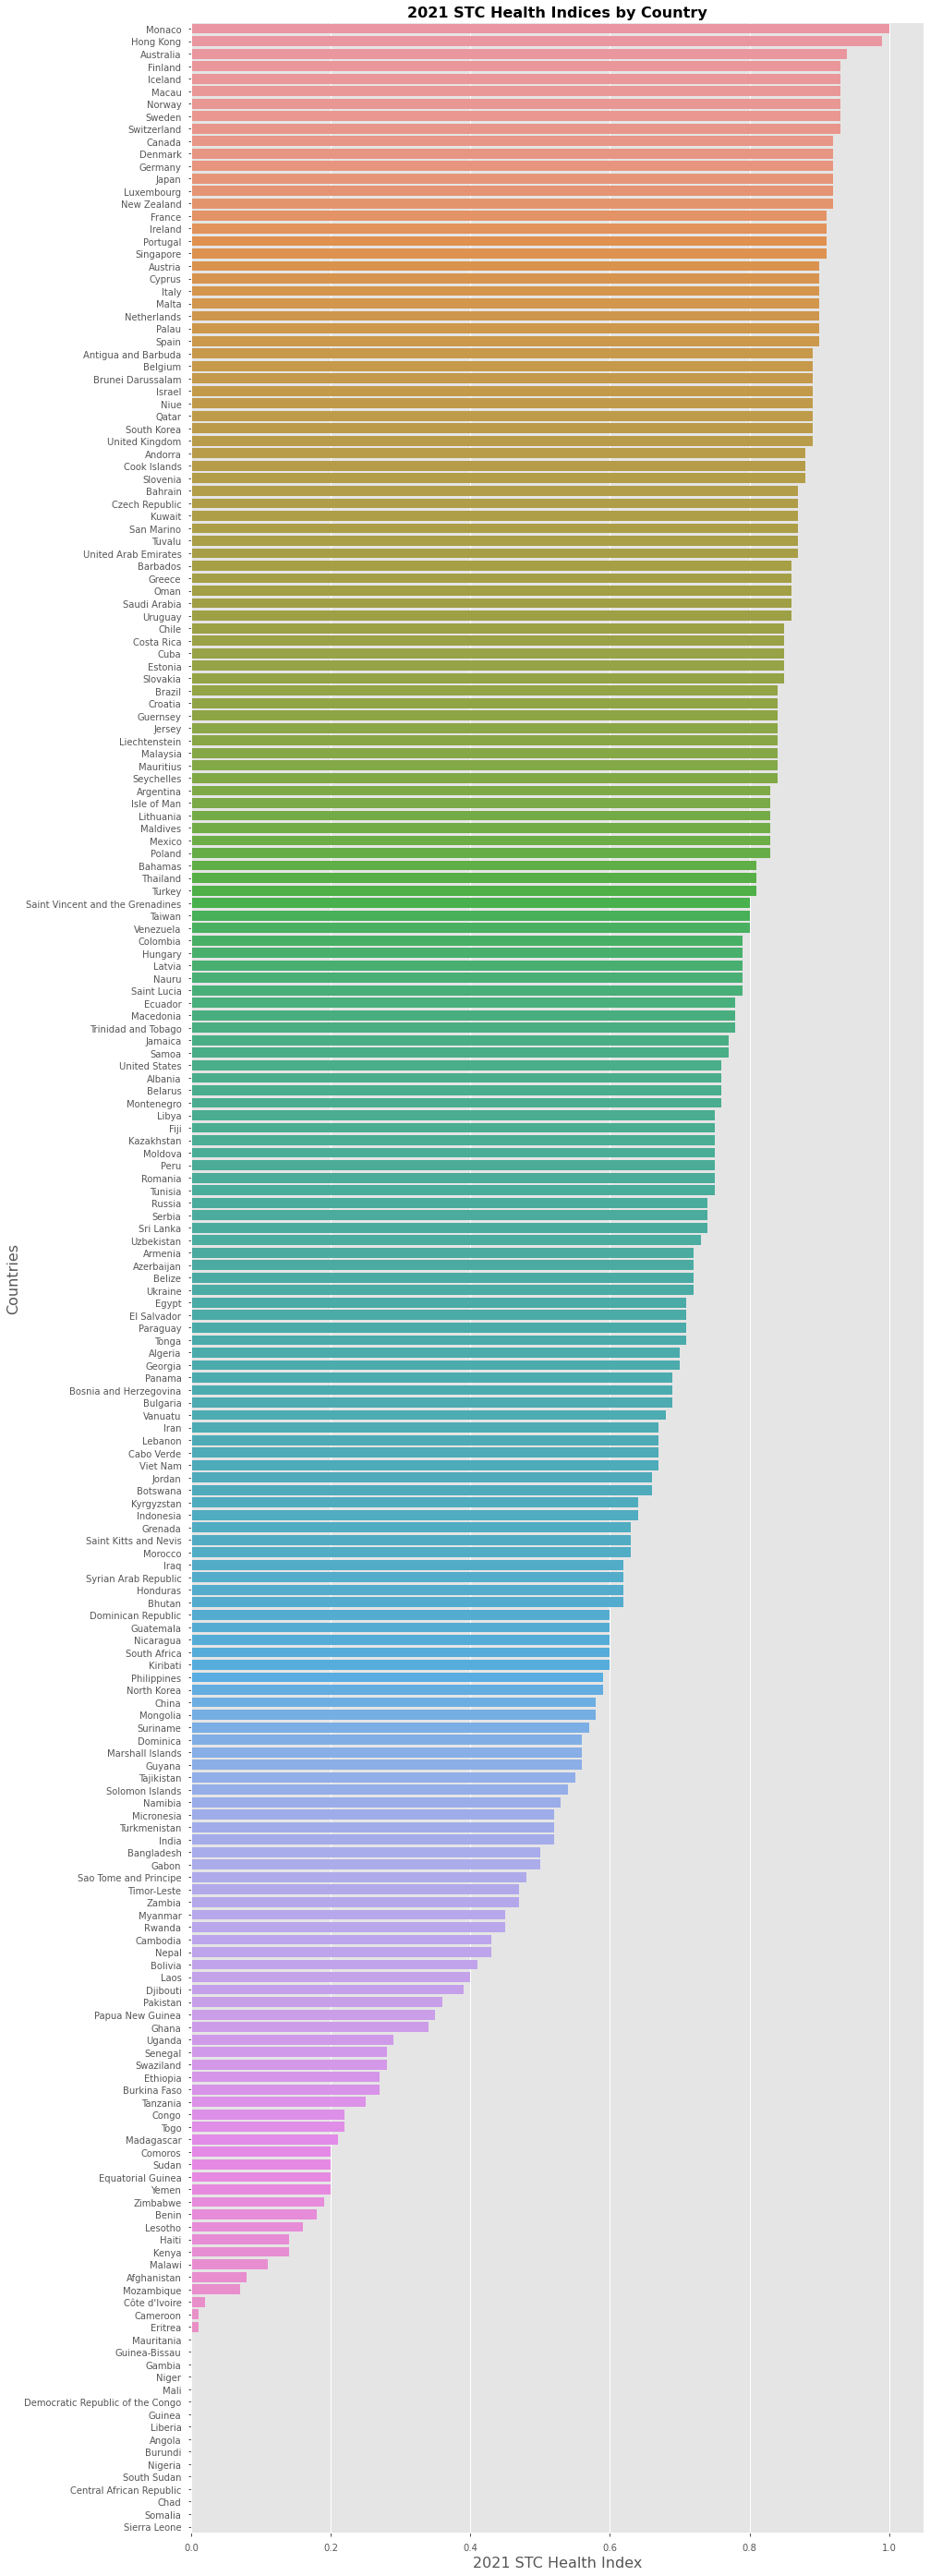

In [80]:
plt.figure(figsize=(14.22, 50))
sns.barplot(x = 'INDEX', y = 'COUNTRY', data = df_health[:])
lbt("2021 STC Health Index", "Countries", "2021 STC Health Indices by Country")

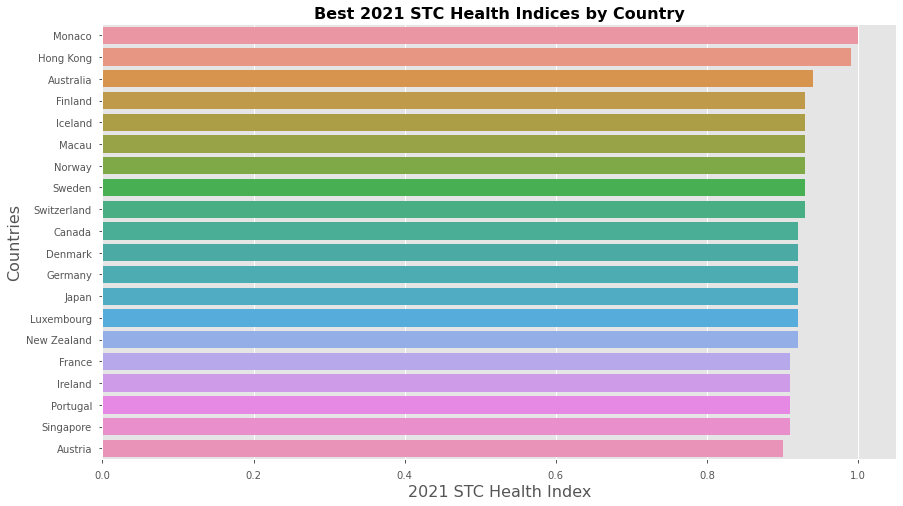

In [81]:
sns.barplot(x = 'INDEX', y = 'COUNTRY', data = df_health[:20])
lbt("2021 STC Health Index", "Countries", "Best 2021 STC Health Indices by Country")

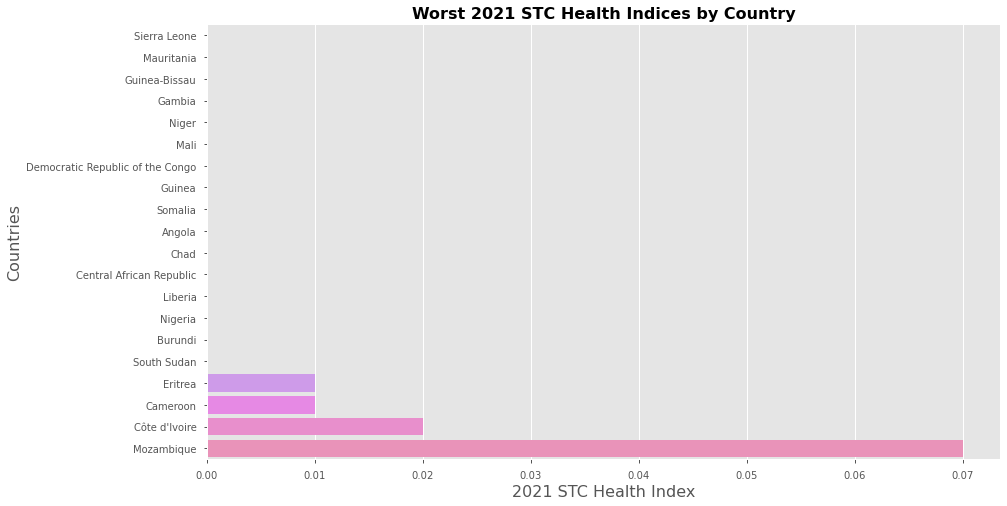

In [82]:
sns.barplot(x = 'INDEX', y = 'COUNTRY', data = df_asc[:20])
lbt("2021 STC Health Index", "Countries", "Worst 2021 STC Health Indices by Country")

### Democracy

In [83]:
df_demo.head(5)

,Country,Overall score,Rank,I Electoral process and pluralism,II Functioning of government,III Political participation,IV Political culture,V Civil liberties,Regime Type
0,Norway,9.81,1,10.00,9.64,10.00,10.00,9.41,Full democracy
1,Iceland,9.37,2,10.00,8.57,8.89,10.00,9.41,Full democracy
2,Sweden,9.26,3,9.58,9.29,8.33,10.00,9.12,Full democracy
3,New Zealand,9.25,4,10.00,8.93,8.89,8.75,9.71,Full democracy
4,Canada,9.24,5,9.58,8.93,8.89,9.38,9.41,Full democracy


In [84]:
df_demo = df_demo[['Country','Overall score','Regime Type']]

In [85]:
df_asc = df_demo.sort_values('Overall score')

In [86]:
df_dsc = df_demo.sort_values('Overall score', ascending=False)

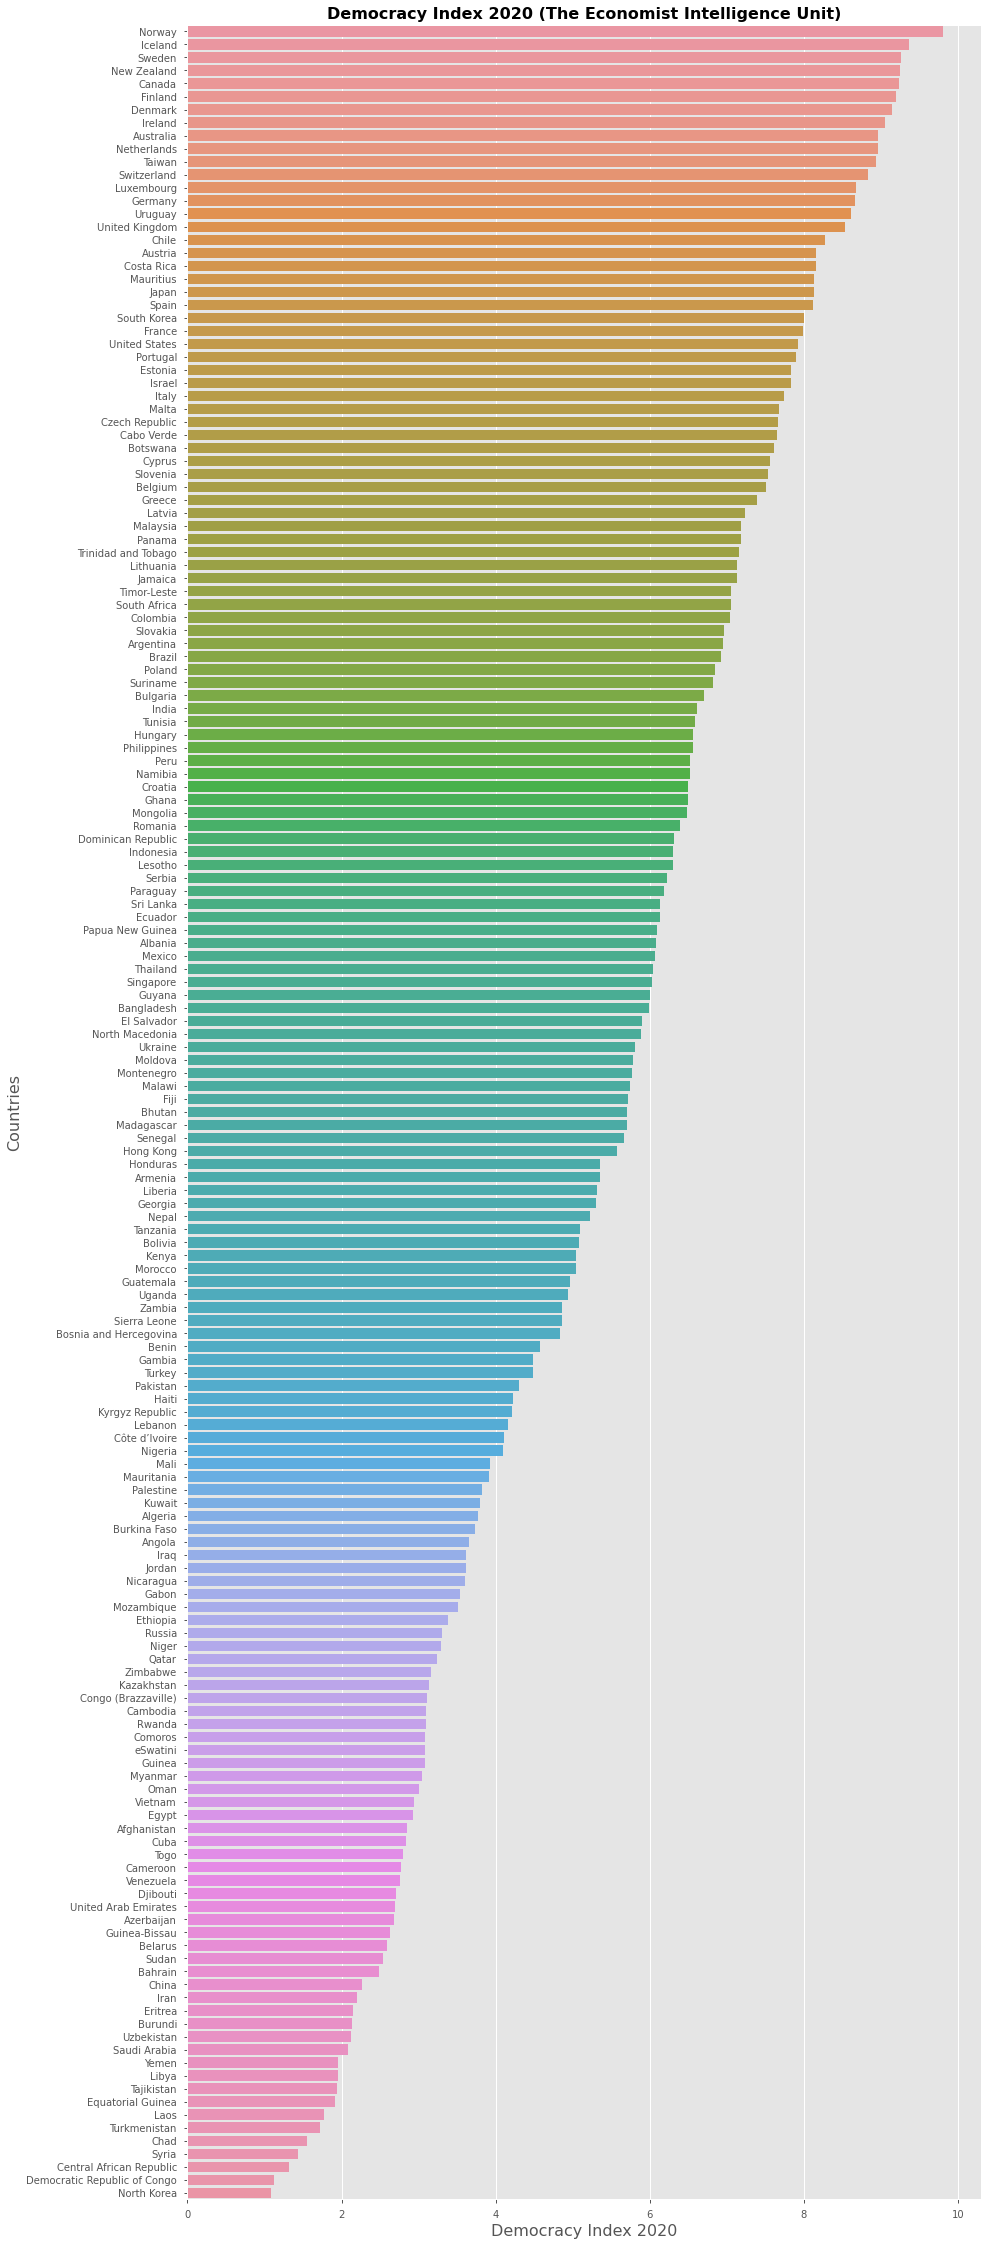

In [87]:
plt.figure(figsize=(14.22, 40))
sns.barplot(x = 'Overall score', y = 'Country', data = df_dsc[:])
lbt("Democracy Index 2020", "Countries", "Democracy Index 2020 (The Economist Intelligence Unit)")

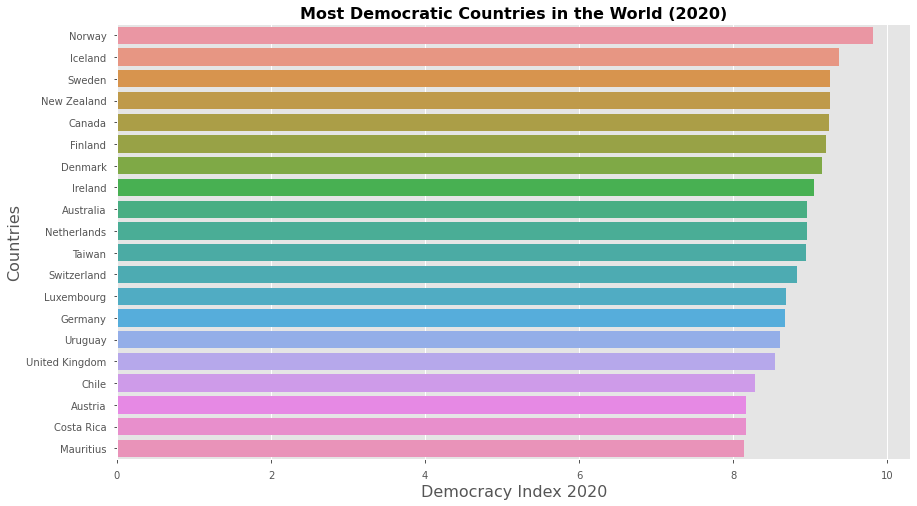

In [88]:
sns.barplot(x = 'Overall score', y = 'Country', data = df_dsc[:20])
lbt("Democracy Index 2020", "Countries", "Most Democratic Countries in the World (2020)")

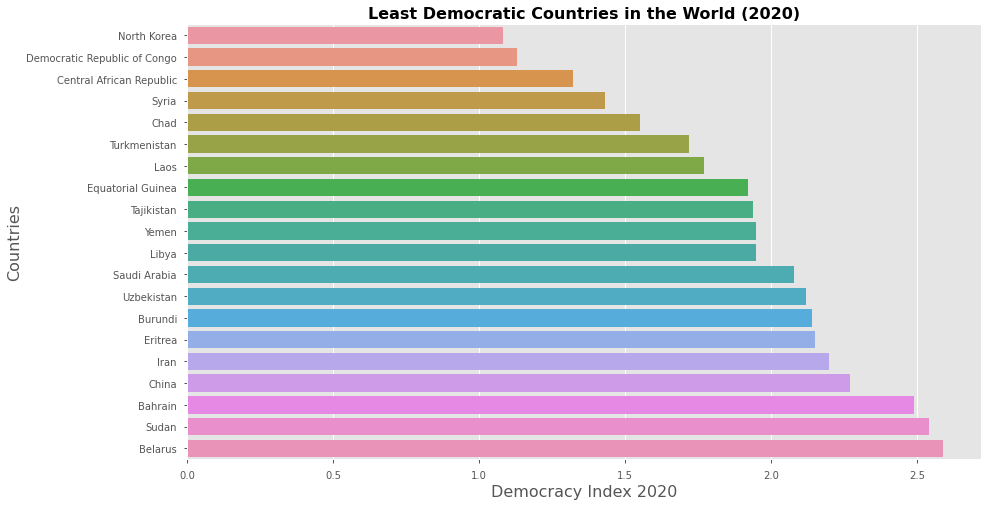

In [89]:
sns.barplot(x = 'Overall score', y = 'Country', data = df_asc[:20])
lbt("Democracy Index 2020", "Countries", "Least Democratic Countries in the World (2020)")

### Joining Dataframes

In [90]:
df_death.head(5)

,location,deaths_2021,total_deaths_2021
0,Afghanistan,86.569,3370.0
1,Africa,63.932,85707.0
2,Albania,443.047,1275.0
3,Algeria,24.355,1068.0
4,Andorra,556.526,43.0


In [91]:
df_death_total = df.copy()

In [92]:
df = df_death_total.merge(df_death,how = 'inner',left_on = 'location', right_on = 'location')
df['deaths_2020'] = df['total_deaths_per_million'] - df['deaths_2021']
df.head(1)

,location,total_deaths_per_million,total_deaths,deaths_2021,total_deaths_2021,deaths_2020
0,Afghanistan,142.852,5561.0,86.569,3370.0,56.283


In [93]:
df = df.merge(df_demo,how = 'inner',left_on = 'location', right_on = 'Country').drop(columns=['Country'])
df.head(1)

,location,total_deaths_per_million,total_deaths,deaths_2021,total_deaths_2021,deaths_2020,Overall score,Regime Type
0,Afghanistan,142.852,5561.0,86.569,3370.0,56.283,2.85,Authoritarian


In [94]:
df = df.merge(df_health,how = 'inner',left_on = 'location', right_on = 'COUNTRY').drop(columns=['COUNTRY'])
df = df.rename(columns={'Overall score':'democracy_index','Regime Type':'regime_type',
                   'INDEX':'health_index'})
df.head(1)

,location,total_deaths_per_million,total_deaths,deaths_2021,total_deaths_2021,deaths_2020,democracy_index,regime_type,health_index
0,Afghanistan,142.852,5561.0,86.569,3370.0,56.283,2.85,Authoritarian,0.08


In [95]:
df_edu = df_edu.rename(columns={'Country':'local'})

In [96]:
df = df.merge(df_edu,how = 'inner',left_on = 'location', right_on = 'local')
df.head(1)

,location,total_deaths_per_million,total_deaths,deaths_2021,total_deaths_2021,deaths_2020,democracy_index,regime_type,health_index,local,2019
0,Afghanistan,142.852,5561.0,86.569,3370.0,56.283,2.85,Authoritarian,0.08,Afghanistan,0.414


In [97]:
df = df.drop(columns = ['local'])
df = df.rename(columns={'2019':'education_index'})

In [98]:
df = df.merge(df_cpi,how = 'inner',left_on = 'location', right_on = 'Country')

In [99]:
df = df.drop(columns = ['Country'])
df = df.rename(columns={'CPI score 2020':'cpi_index'})

In [100]:
df.head(1)

,location,total_deaths_per_million,total_deaths,deaths_2021,total_deaths_2021,deaths_2020,democracy_index,regime_type,health_index,education_index,cpi_index
0,Afghanistan,142.852,5561.0,86.569,3370.0,56.283,2.85,Authoritarian,0.08,0.414,19


In [101]:
df = df.merge(df_gdp,how = 'inner',left_on = 'location', right_on = 'Country Name').drop(columns = ['Country Name'])

In [102]:
df = df.rename(columns={'GDP':'gdp'})

In [103]:
np.sum(df.isnull())

location                    0
total_deaths_per_million    0
total_deaths                0
deaths_2021                 2
total_deaths_2021           2
deaths_2020                 2
democracy_index             0
regime_type                 0
health_index                0
education_index             0
cpi_index                   0
gdp                         0
dtype: int64

In [104]:
df = df[~df['deaths_2021'].isna()]

In [105]:
df.sort_values('gdp',ascending=False)

,location,total_deaths_per_million,total_deaths,deaths_2021,total_deaths_2021,deaths_2020,democracy_index,regime_type,health_index,education_index,cpi_index,gdp
124,United States,1834.221,607132.0,770.284,254966.0,1063.937,7.92,Flawed democracy,0.76,0.900,67,2.093660e+13
25,China,3.221,4636.0,0.001,2.0,3.220,2.27,Authoritarian,0.58,0.657,42,1.472273e+13
43,Germany,1088.980,91239.0,685.669,57448.0,403.311,8.67,Full democracy,0.92,0.943,80,3.806060e+12
123,United Kingdom,1895.310,128665.0,810.815,55043.0,1084.495,8.54,Full democracy,0.89,0.928,77,2.707744e+12
53,India,295.680,408040.0,187.899,259302.0,107.781,6.61,Flawed democracy,0.52,0.555,40,2.622984e+12
...,...,...,...,...,...,...,...,...,...,...,...,...
18,Burundi,0.673,8.0,0.505,6.0,0.168,2.14,Authoritarian,0.00,0.417,19,3.258187e+09
66,Liberia,28.472,144.0,12.061,61.0,16.411,5.32,Hybrid regime,0.00,0.426,28,2.950000e+09
22,Central African Republic,20.291,98.0,7.247,35.0,13.044,1.32,Authoritarian,0.00,0.353,26,2.303078e+09
65,Lesotho,156.377,335.0,132.570,284.0,23.807,6.30,Flawed democracy,0.16,0.532,41,1.844510e+09


In [106]:
df['education_index'] = df['education_index'].astype("float")

In [107]:
df.corr()

,total_deaths_per_million,total_deaths,deaths_2021,total_deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
total_deaths_per_million,1.000000,0.402158,0.949680,0.384977,0.933578,0.435117,0.506127,0.500645,0.287640,0.103134
total_deaths,0.402158,1.000000,0.358213,0.979491,0.402573,0.200144,0.182700,0.165152,0.086433,0.588103
deaths_2021,0.949680,0.358213,1.000000,0.365655,0.774349,0.399511,0.459876,0.439711,0.215852,0.048196
total_deaths_2021,0.384977,0.979491,0.365655,1.000000,0.359349,0.186349,0.169159,0.136123,0.054317,0.476537
deaths_2020,0.933578,0.402573,0.774349,0.359349,1.000000,0.421903,0.496289,0.508285,0.334112,0.153203
democracy_index,0.435117,0.200144,0.399511,0.186349,0.421903,1.000000,0.668532,0.712121,0.770556,0.086293
health_index,0.506127,0.182700,0.459876,0.169159,0.496289,0.668532,1.000000,0.887075,0.697351,0.122179
education_index,0.500645,0.165152,0.439711,0.136123,0.508285,0.712121,0.887075,1.000000,0.763734,0.178520
cpi_index,0.287640,0.086433,0.215852,0.054317,0.334112,0.770556,0.697351,0.763734,1.000000,0.177107
gdp,0.103134,0.588103,0.048196,0.476537,0.153203,0.086293,0.122179,0.178520,0.177107,1.000000


# 4. Data Modeling

### GDP x Deaths

In [108]:
spm('total_deaths_per_million', 'gdp')

0.3892599362579677
Correlation: Moderate


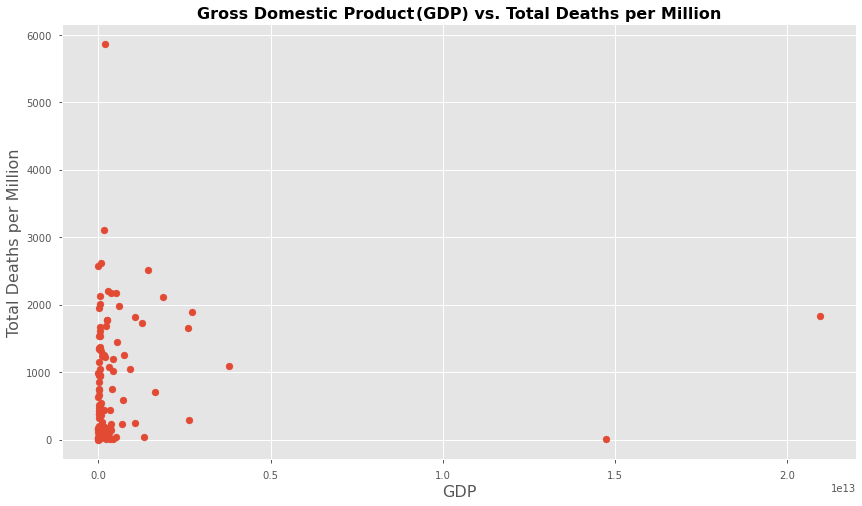

In [109]:
plt.scatter(df['gdp'],df['total_deaths_per_million'])
lbt("GDP", "Total Deaths per Million", "Gross Domestic Product (GDP) vs. Total Deaths per Million")

Moderate (to weak) correlation between GDP and total deaths per million.

### Histogram

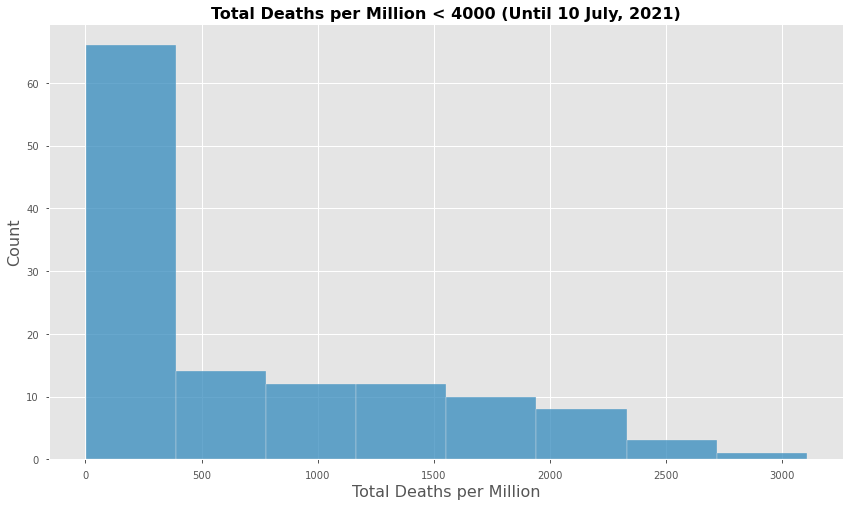

In [110]:
sns.histplot(data=df[df["total_deaths_per_million"] < 4000], x="total_deaths_per_million")
lbt("Total Deaths per Million", "Count", "Total Deaths per Million < 4000 (Until 10 July, 2021)")

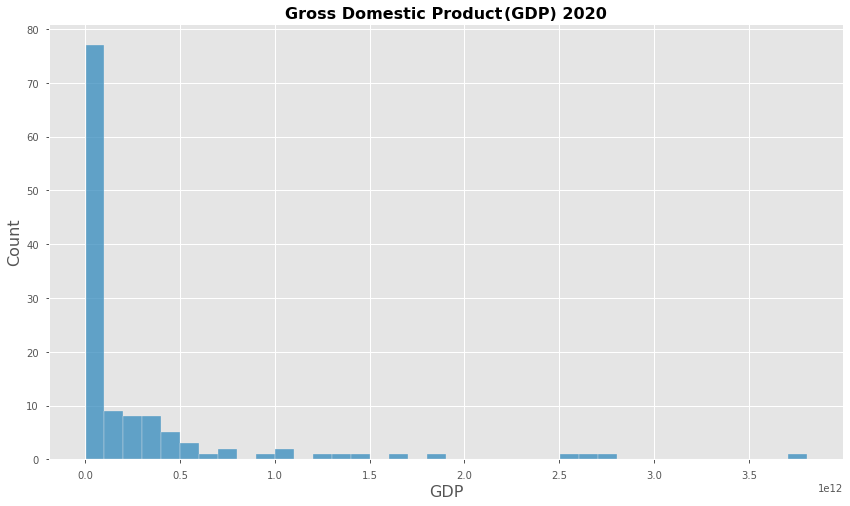

In [111]:
sns.histplot(data=df[df['gdp']<0.4e13], x="gdp")
lbt("GDP", "Count", "Gross Domestic Product (GDP) 2020")

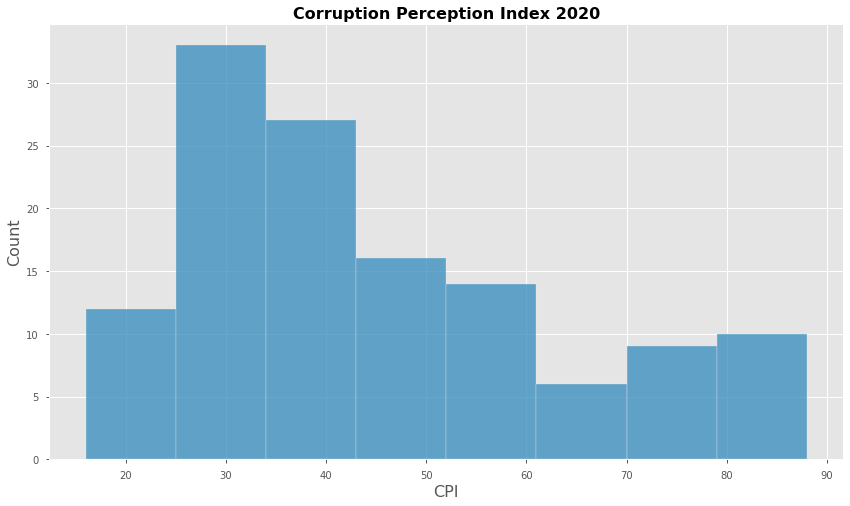

In [112]:
sns.histplot(data=df, x="cpi_index")
lbt("CPI", "Count", "Corruption Perception Index 2020")

High concentration of more corrupt countries (between 25 and 45).

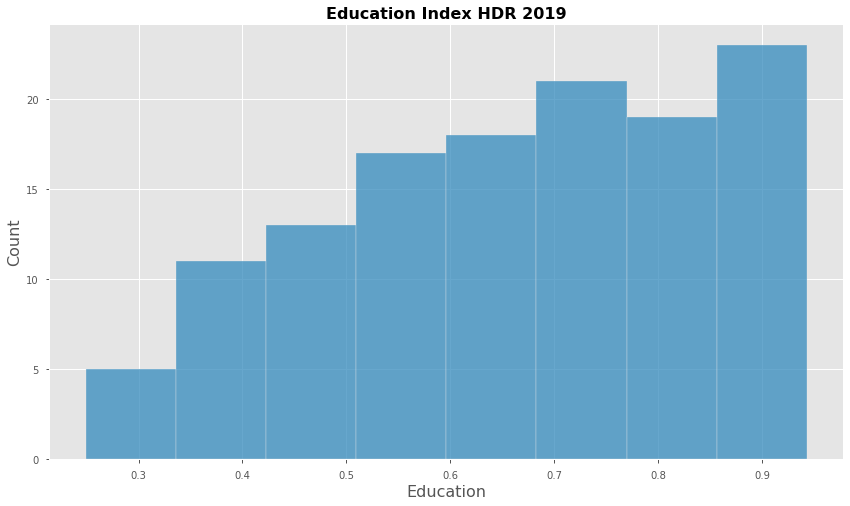

In [113]:
sns.histplot(data=df, x="education_index")
lbt("Education", "Count", "Education Index HDR 2019")

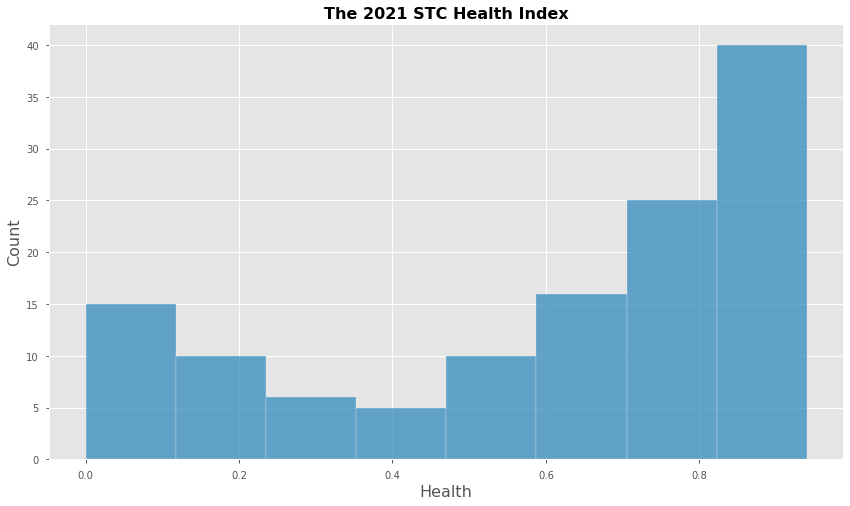

In [114]:
sns.histplot(data=df, x="health_index")
lbt("Health", "Count", "The 2021 STC Health Index")

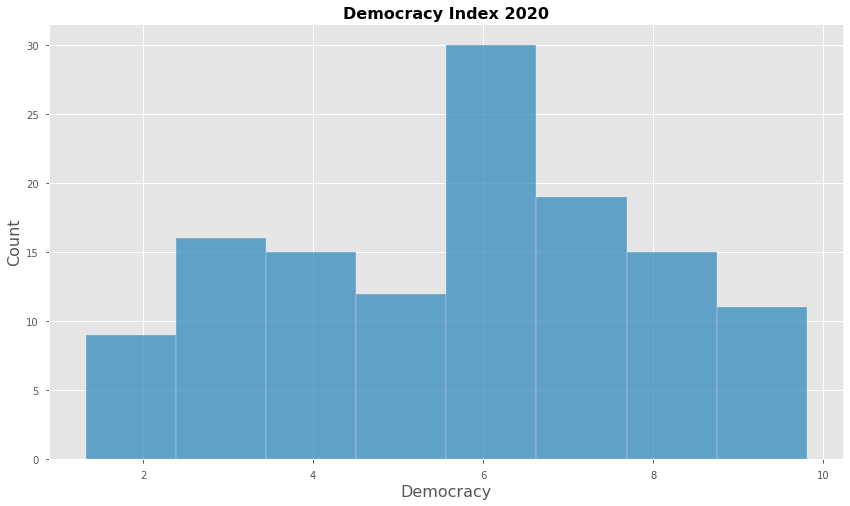

In [115]:
sns.histplot(data=df, x="democracy_index")
lbt("Democracy", "Count", "Democracy Index 2020")

### Corruption x Deaths

In [116]:
spm('total_deaths_per_million','cpi_index')

0.44718329600933904
Correlation: Moderate


In [117]:
spm('education_index', 'cpi_index')

0.7914152453415276
Correlation: Strong


In [118]:
spm('health_index', 'cpi_index')

0.8059163269761505
Correlation: Strong


In [119]:
spm('democracy_index', 'cpi_index')

0.780479082943608
Correlation: Strong


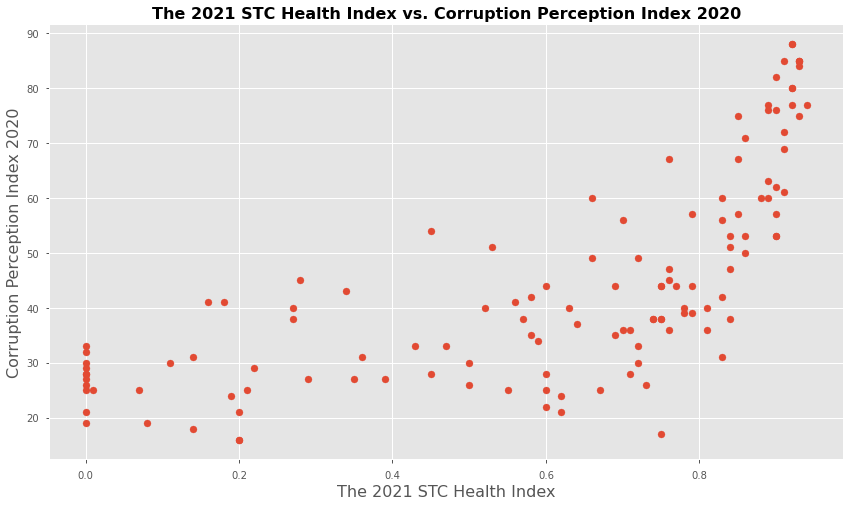

In [120]:
plt.scatter(df['health_index'],df['cpi_index'])
lbt('The 2021 STC Health Index', 'Corruption Perception Index 2020', 'The 2021 STC Health Index vs. Corruption Perception Index 2020')

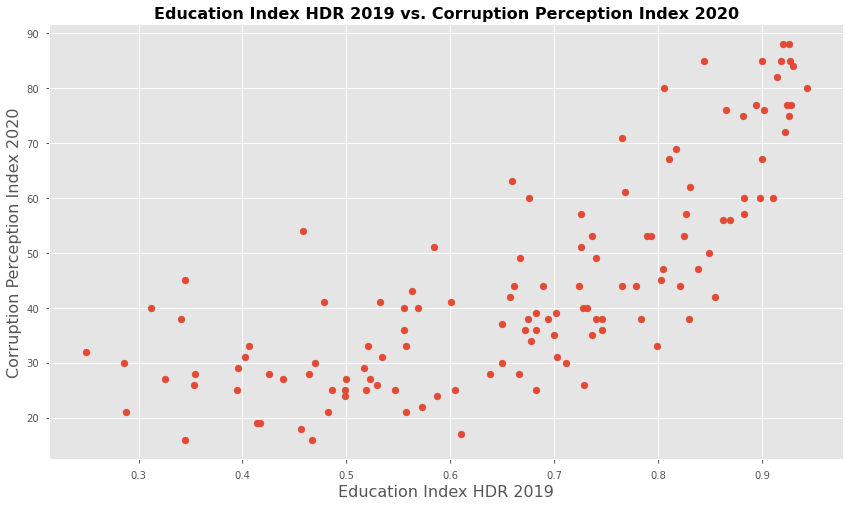

In [121]:
plt.scatter(df['education_index'],df['cpi_index'])
lbt('Education Index HDR 2019', 'Corruption Perception Index 2020', 'Education Index HDR 2019 vs. Corruption Perception Index 2020')

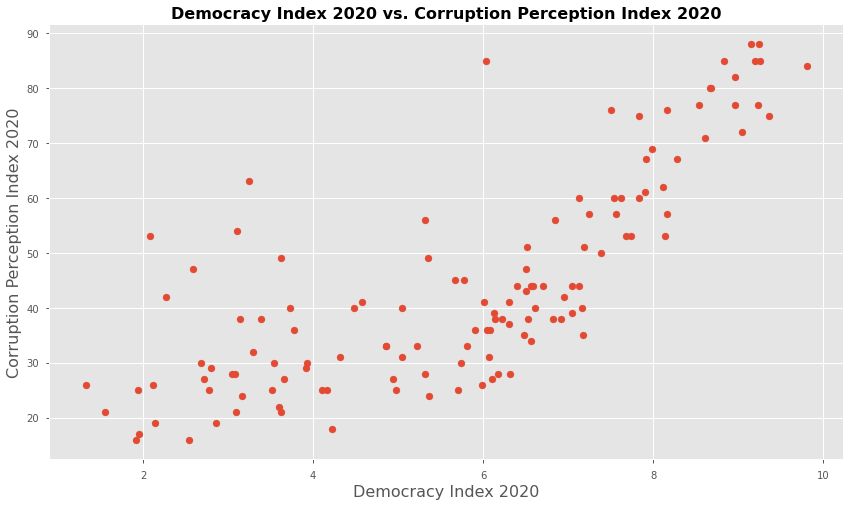

In [122]:
plt.scatter(df['democracy_index'],df['cpi_index'])
lbt('Democracy Index 2020', 'Corruption Perception Index 2020', 'Democracy Index 2020 vs. Corruption Perception Index 2020')

There is a strong connection between corruption and health, education, and democracy, despite the correlation between corruption and deaths per million is moderate (0.45).

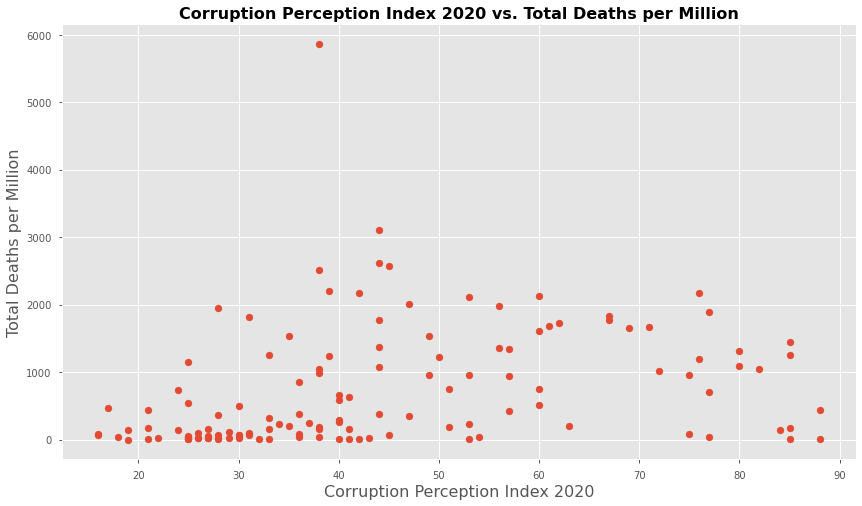

In [123]:
plt.scatter(df['cpi_index'],df['total_deaths_per_million'])
lbt('Corruption Perception Index 2020', 'Total Deaths per Million', 'Corruption Perception Index 2020 vs. Total Deaths per Million')

In [124]:
df['cpi_index'].describe()

count    127.000000
mean      44.464567
std       19.198543
min       16.000000
25%       29.000000
50%       40.000000
75%       56.500000
max       88.000000
Name: cpi_index, dtype: float64

In [125]:
df[df['cpi_index']<25]['total_deaths_per_million']

0      142.852
18       0.673
23      10.593
27     167.894
36      86.957
49      41.307
50     731.983
55     435.453
67     470.363
87      28.983
111     62.943
128    143.040
Name: total_deaths_per_million, dtype: float64

In [126]:
df[df['cpi_index']<25]['health_index']

0      0.08
18     0.00
23     0.00
27     0.20
36     0.20
49     0.14
50     0.62
55     0.62
67     0.75
87     0.60
111    0.20
128    0.19
Name: health_index, dtype: float64

In [127]:
spm25('cpi_index', 'total_deaths_per_million', 'cpi_index', 'health_index')

0.7385573999135294
Correlation: Strong


### Health x Deaths

In [128]:
spm('total_deaths_per_million', 'health_index')

0.5872757313548939
Correlation: Strong


In [129]:
spm('deaths_2020', 'health_index')

0.6143647118461144
Correlation: Strong


In [130]:
spm('deaths_2021', 'health_index')

0.5047660147537406
Correlation: Strong


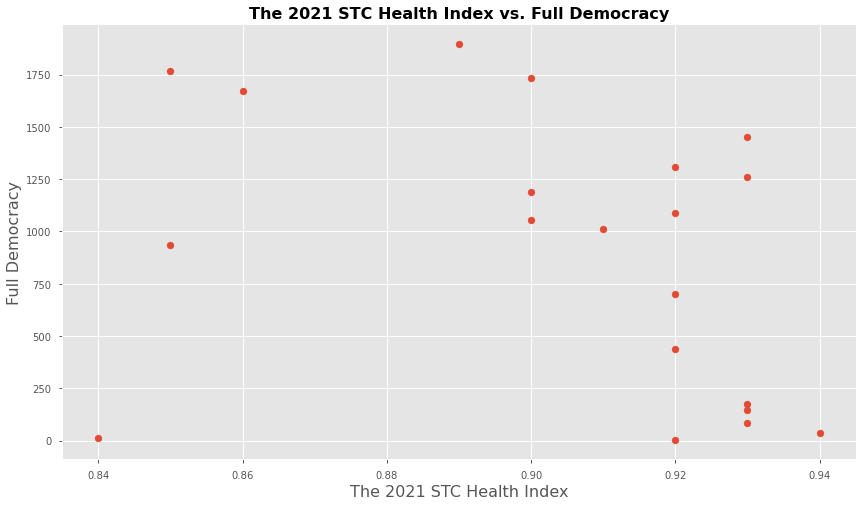

In [131]:
plt.scatter(df[df['regime_type'] == 'Full democracy']['health_index'],df[df['regime_type'] == 'Full democracy']['total_deaths_per_million'])
lbt('The 2021 STC Health Index', 'Full Democracy', 'The 2021 STC Health Index vs. Full Democracy')

In [132]:
df['cpi_index'].describe()

count    127.000000
mean      44.464567
std       19.198543
min       16.000000
25%       29.000000
50%       40.000000
75%       56.500000
max       88.000000
Name: cpi_index, dtype: float64

In [133]:
spm25('cpi_index', 'total_deaths_per_million', 'cpi_index', 'health_index')

0.7385573999135294
Correlation: Strong


In [134]:
spm('total_deaths_per_million', 'health_index')

0.5872757313548939
Correlation: Strong


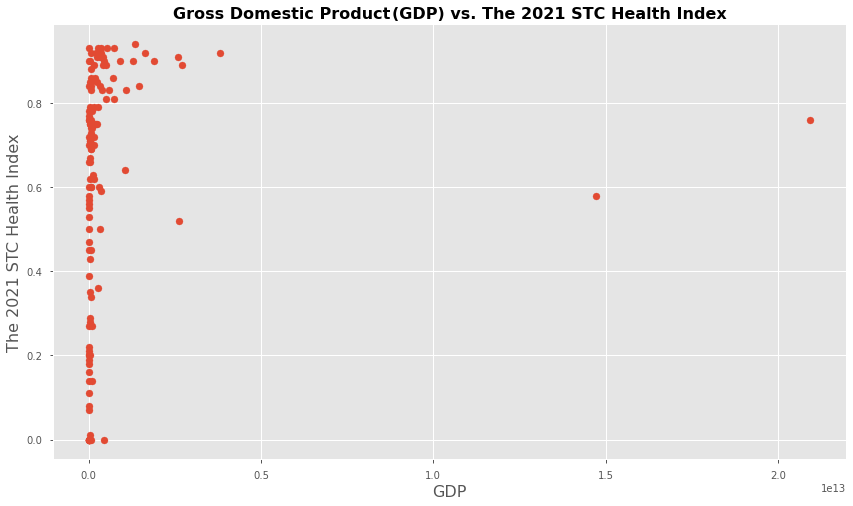

In [135]:
plt.scatter(df['gdp'],df['health_index'])
lbt('GDP', 'The 2021 STC Health Index', 'Gross Domestic Product (GDP) vs. The 2021 STC Health Index')

### Education x Deaths

In [136]:
spm('total_deaths_per_million', 'education_index')

0.6011204934963441
Correlation: Strong


This aspect has the strongest correlation with the total deaths per million.

In [137]:
spm('deaths_2020', 'education_index')

0.6206156123991776
Correlation: Strong


In [138]:
spm('deaths_2021', 'education_index')

0.5247101732166276
Correlation: Strong


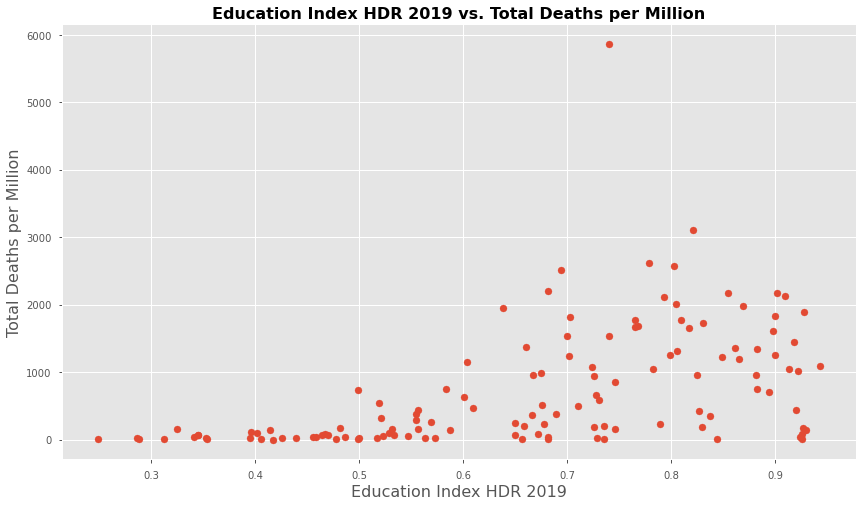

In [139]:
plt.scatter(df['education_index'],df['total_deaths_per_million'])
lbt('Education Index HDR 2019', 'Total Deaths per Million', 'Education Index HDR 2019 vs. Total Deaths per Million')

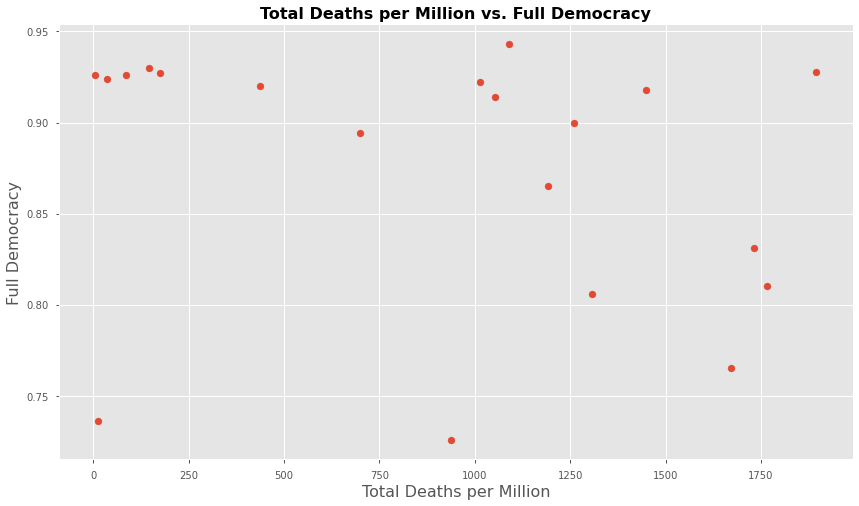

In [140]:
plt.scatter(df[df['regime_type'] == 'Full democracy']['total_deaths_per_million'],df[df['regime_type'] == 'Full democracy']['education_index'])
lbt('Total Deaths per Million', 'Full Democracy', 'Total Deaths per Million vs. Full Democracy')

In [141]:
spm_equal('regime_type', 'Full democracy', 'total_deaths_per_million', 'regime_type', 'Full democracy', 'education_index')

-0.2715306698227892
Negative Correlation: Weak


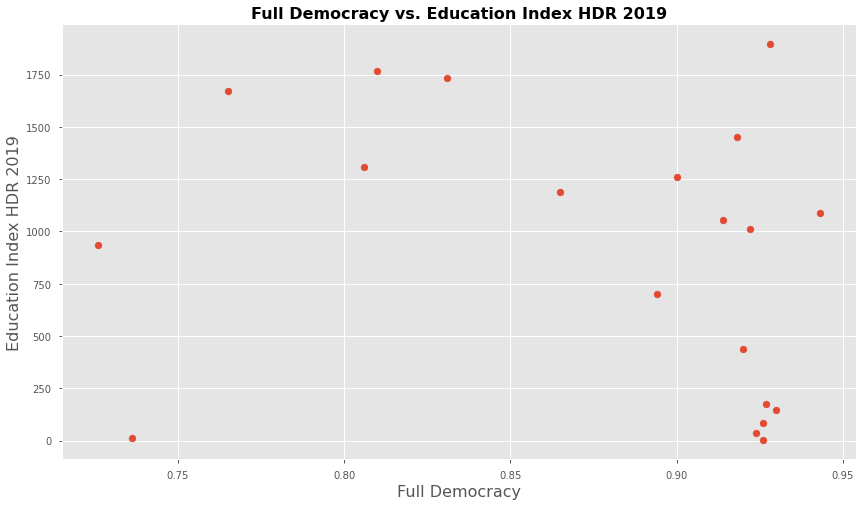

In [142]:
plt.scatter(df[df['regime_type'] == 'Full democracy']['education_index'],df[df['regime_type'] == 'Full democracy']['total_deaths_per_million'])
lbt('Full Democracy', 'Education Index HDR 2019', 'Full Democracy vs. Education Index HDR 2019')

In [143]:
spm_equal('regime_type', 'Flawed democracy', 'total_deaths_per_million', 'regime_type', 'Flawed democracy', 'education_index')

0.44879902442158476
Correlation: Moderate


### Democracy x Deaths

In [144]:
spm('total_deaths_per_million', 'democracy_index')

0.5487716461868564
Correlation: Strong


In [145]:
spearmanr(df['total_deaths_per_million'], df['democracy_index'])

SpearmanrResult(correlation=0.5487716461868564, pvalue=2.3966409904401642e-11)

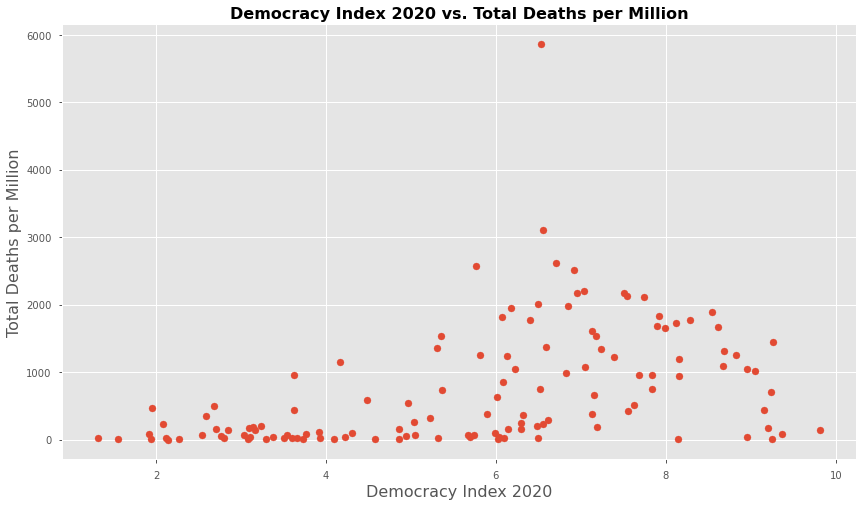

In [146]:
plt.scatter(df['democracy_index'],df['total_deaths_per_million'])
lbt('Democracy Index 2020', 'Total Deaths per Million', 'Democracy Index 2020 vs. Total Deaths per Million')

Very similar to the Education Index HDR 2019 vs. Total Deaths per Million.

In [147]:
spm_equal('regime_type', 'Full democracy', 'total_deaths_per_million', 'regime_type', 'Full democracy', 'democracy_index')

-0.4710309836061585
Negative Correlation: Moderate


# 5. Evaluate the Results

In [148]:
df['total_deaths_per_million'].describe()

count     127.000000
mean      740.170677
std       890.740749
min         0.673000
25%        63.933500
50%       358.502000
75%      1246.425500
max      5860.454000
Name: total_deaths_per_million, dtype: float64

In [149]:
top = df[df['total_deaths_per_million']>343.623]
bottom = df[df['total_deaths_per_million']<=343.623]

**Top 50% of Total Deaths per Million**

In [150]:
top.describe()

,total_deaths_per_million,total_deaths,deaths_2021,total_deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,6.500000e+01
mean,1362.618062,46426.907692,746.953385,23834.907692,615.664677,6.801538,0.786615,0.770154,51.430769,7.216920e+11
std,865.666851,105385.841584,507.922425,54778.284903,462.837314,1.632295,0.107838,0.112576,17.985210,2.646951e+12
min,343.623000,380.000000,116.900000,201.000000,17.860000,1.950000,0.530000,0.499000,17.000000,3.807923e+09
25%,743.454000,3247.000000,417.006000,1726.000000,260.475000,6.080000,0.720000,0.694000,38.000000,3.338325e+10
50%,1236.407000,9688.000000,603.741000,4702.000000,471.887000,7.040000,0.790000,0.783000,49.000000,7.760463e+10
75%,1778.593000,33767.000000,938.400000,18449.000000,917.151000,7.900000,0.890000,0.865000,62.000000,4.186218e+11
max,5860.454000,607132.000000,3037.743000,337944.000000,2822.711000,9.260000,0.930000,0.943000,88.000000,2.093660e+13


According to the first question, half of the countries that have an expressive high number of deaths are formed by prosperous nations. This also will become clearer with the clustering. There is a very strong relation between the health index and the death rate. Democracy and corruption are also associated with the high death rate.

**Bottom 50% of Total Deaths per Million**

In [151]:
bottom.describe()

,total_deaths_per_million,total_deaths,deaths_2021,total_deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,87.604871,10244.709677,51.912194,6314.080645,35.692677,4.641452,0.401129,0.555790,37.161290,4.111626e+11
std,83.438554,52193.782854,61.108856,33216.010365,42.959138,2.099324,0.318223,0.179604,17.777489,1.890021e+12
min,0.673000,8.000000,0.000000,0.000000,0.168000,1.320000,0.000000,0.249000,16.000000,1.219690e+09
25%,20.947500,169.500000,6.526750,73.250000,7.293000,3.092500,0.140000,0.419250,26.000000,1.275039e+10
50%,56.409500,855.000000,27.562000,437.000000,16.801500,4.160000,0.355000,0.526000,31.500000,2.425121e+10
75%,149.917750,3543.500000,63.845250,1757.250000,54.535500,6.037500,0.637500,0.676500,40.750000,1.639700e+11
max,321.312000,408040.000000,257.613000,259302.000000,200.160000,9.810000,0.940000,0.930000,88.000000,1.472273e+13


The most authoritarian countries performed better in terms of mortality, despite having less education, health and resources.

In [152]:
top_2021 = df[df['deaths_2021']>192]
bottom_2021 = df[df['deaths_2021']<=192]

**Top 50% of 2021 Total Deaths per Million**

In [153]:
top_2021.describe()

,total_deaths_per_million,total_deaths,deaths_2021,total_deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,6.400000e+01
mean,1373.908547,46936.750000,759.275172,24221.390625,614.633375,6.843125,0.784531,0.774047,51.968750,7.294698e+11
std,868.558684,106134.424772,502.839751,55126.548796,471.091747,1.602815,0.115840,0.110611,17.629312,2.667176e+12
min,208.645000,380.000000,192.924000,201.000000,0.305000,1.950000,0.430000,0.499000,17.000000,3.807923e+09
25%,749.931750,3243.250000,434.976750,1747.000000,257.252250,6.117500,0.720000,0.701500,38.750000,3.279493e+10
50%,1246.425500,9525.000000,624.468500,5250.500000,475.950500,7.045000,0.790000,0.788000,49.000000,7.118454e+10
75%,1789.428250,33879.250000,942.753250,18953.500000,920.900000,7.905000,0.890000,0.866000,63.250000,4.212077e+11
max,5860.454000,607132.000000,3037.743000,337944.000000,2822.711000,9.260000,0.930000,0.943000,88.000000,2.093660e+13


**Bottom 50% of 2021 Total Deaths per Million**

In [154]:
bottom_2021.describe()

,total_deaths_per_million,total_deaths,deaths_2021,total_deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,6.300000e+01
mean,96.373476,10301.095238,50.427222,6199.571429,45.946254,4.633492,0.409365,0.555238,36.841270,4.081903e+11
std,100.654301,51780.779176,54.838010,32951.730423,63.163726,2.088998,0.319348,0.177171,17.778391,1.874793e+12
min,0.673000,8.000000,0.000000,0.000000,0.168000,1.320000,0.000000,0.249000,16.000000,1.219690e+09
25%,21.604000,171.000000,6.762500,76.500000,8.038500,3.095000,0.140000,0.421500,26.000000,1.301974e+10
50%,62.943000,928.000000,29.465000,459.000000,18.345000,4.100000,0.360000,0.532000,31.000000,2.491090e+10
75%,153.662000,3645.000000,70.653000,1751.500000,61.519500,6.035000,0.670000,0.669000,40.500000,1.685299e+11
max,435.453000,408040.000000,187.899000,259302.000000,318.553000,9.810000,0.940000,0.930000,88.000000,1.472273e+13


In [155]:
df['deaths_2020'].describe()

count     127.000000
mean      332.528740
std       440.924898
min         0.168000
25%        17.368000
50%       107.781000
75%       475.950500
max      2822.711000
Name: deaths_2020, dtype: float64

In [156]:
top_2020 = df[df['deaths_2020']>107.78]
bottom_2020 = df[df['deaths_2020']<=107.78]

**Top 50% of 2020 Total Deaths per Million**

In [157]:
top_2020.describe()

,total_deaths_per_million,total_deaths,deaths_2021,total_deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,6.400000e+01
mean,1336.859750,53683.000000,707.038484,28171.546875,629.821266,6.592656,0.785781,0.771266,50.750000,7.875052e+11
std,893.521682,114993.452602,520.989510,62409.823749,454.914209,1.792010,0.109759,0.116142,18.027316,2.672548e+12
min,190.076000,380.000000,43.032000,201.000000,107.781000,1.950000,0.520000,0.499000,17.000000,3.807923e+09
25%,723.785250,4416.750000,371.728500,1805.750000,266.605500,5.877500,0.717500,0.698500,38.000000,4.176430e+10
50%,1230.452000,10274.500000,594.341500,4788.500000,475.950500,6.835000,0.790000,0.796000,47.000000,1.552975e+11
75%,1789.428250,38186.000000,907.811250,22654.000000,920.900000,7.855000,0.890000,0.866000,61.250000,5.209018e+11
max,5860.454000,607132.000000,3037.743000,337944.000000,2822.711000,9.260000,0.930000,0.943000,88.000000,2.093660e+13


**Bottom 50% of 2020 Total Deaths per Million**

In [158]:
bottom_2020.describe()

,total_deaths_per_million,total_deaths,deaths_2021,total_deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,6.300000e+01
mean,134.010349,3447.761905,103.493063,2186.714286,30.517286,4.887937,0.408095,0.558063,38.079365,3.492337e+11
std,245.549667,9258.345642,234.289941,6043.086507,30.003608,2.173320,0.320009,0.177075,18.347279,1.854778e+12
min,0.673000,8.000000,0.000000,0.000000,0.168000,1.320000,0.000000,0.249000,16.000000,1.219690e+09
25%,21.604000,171.000000,6.762500,76.500000,7.483000,3.130000,0.140000,0.421500,26.000000,1.229166e+10
50%,62.943000,911.000000,29.465000,459.000000,16.876000,4.580000,0.360000,0.529000,32.000000,1.980707e+10
75%,153.662000,2692.500000,106.879000,1499.000000,50.699000,6.300000,0.680000,0.680000,42.500000,1.032440e+11
max,1671.692000,65457.000000,1619.587000,43319.000000,101.987000,9.810000,0.940000,0.930000,88.000000,1.472273e+13


In [159]:
df_full_democracy = df[df['regime_type']=='Full democracy']

In [160]:
df_full_democracy['deaths_2021'].describe()

count      20.000000
mean      436.566150
std       398.401641
min         0.000000
25%        72.776500
50%       440.250000
75%       600.637750
max      1619.587000
Name: deaths_2021, dtype: float64

In [161]:
top_fd = df_full_democracy[df_full_democracy['deaths_2021']>440.250000]
bottom_fd = df_full_democracy[df_full_democracy['deaths_2021']<=440.250000]

**Top 50% Full Democracy**

In [162]:
top_fd.describe()

,total_deaths_per_million,total_deaths,deaths_2021,total_deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,1405.453500,37644.500000,733.083000,18154.000000,672.370500,8.553000,0.893000,0.851400,72.700000,9.621554e+11
std,346.198506,45730.470749,338.605599,21959.878172,332.703717,0.387443,0.029833,0.075457,8.718435,1.287819e+12
min,936.964000,819.000000,499.756000,324.000000,52.105000,8.120000,0.850000,0.726000,57.000000,5.362883e+10
25%,1114.384500,5206.250000,528.388250,3202.000000,434.953500,8.190000,0.867500,0.807000,68.000000,1.181830e+11
50%,1379.132000,12683.000000,615.490500,5771.000000,740.803500,8.575000,0.900000,0.848000,74.000000,4.237936e+11
75%,1717.303250,69194.000000,779.528500,26914.250000,867.624500,8.677500,0.917500,0.921000,79.250000,1.095302e+12
max,1895.310000,128665.000000,1619.587000,57448.000000,1087.311000,9.260000,0.930000,0.943000,85.000000,3.806060e+12


**Bottom 50% Full Democracy**

In [163]:
bottom_fd.describe()

,total_deaths_per_million,total_deaths,deaths_2021,total_deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
count,10.000000,10.000000,10.000000,10.0000,10.000000,10.00000,10.000000,10.000000,10.000000,1.000000e+01
mean,391.350800,6063.200000,140.049300,2243.2000,251.301500,9.09100,0.916000,0.899700,79.400000,5.868057e+11
std,460.204083,9322.361036,158.263096,3614.8261,307.516201,0.43005,0.028752,0.058769,10.362325,5.574579e+11
min,5.392000,18.000000,0.000000,0.0000,5.184000,8.14000,0.840000,0.736000,53.000000,1.091407e+10
25%,48.040000,220.750000,1.728750,3.5000,46.841250,8.96000,0.920000,0.903500,77.000000,2.271700e+11
50%,161.490000,943.500000,70.653000,387.5000,93.116000,9.17500,0.925000,0.922000,83.000000,3.585965e+11
75%,634.024250,8808.500000,264.783500,2750.2500,369.240750,9.24750,0.930000,0.926000,85.000000,8.711739e+11
max,1259.212000,26389.000000,380.744000,10627.0000,883.343000,9.81000,0.940000,0.930000,88.000000,1.643408e+12


### Clustering

In [164]:
df.head(5)

,location,total_deaths_per_million,total_deaths,deaths_2021,total_deaths_2021,deaths_2020,democracy_index,regime_type,health_index,education_index,cpi_index,gdp
0,Afghanistan,142.852,5561.0,86.569,3370.0,56.283,2.85,Authoritarian,0.08,0.414,19,1.980707e+10
1,Albania,853.430,2456.0,443.047,1275.0,410.383,6.08,Flawed democracy,0.76,0.746,36,1.479962e+10
2,Algeria,87.204,3824.0,24.355,1068.0,62.849,3.77,Authoritarian,0.70,0.672,36,1.451639e+11
3,Angola,28.266,929.0,15.943,524.0,12.323,3.66,Authoritarian,0.00,0.500,27,6.230691e+10
4,Argentina,2179.429,98501.0,1222.592,55256.0,956.837,6.95,Flawed democracy,0.83,0.855,42,3.830670e+11


In [165]:
df = df.drop(columns=['total_deaths', 'total_deaths_2021'])

I'm removing the total number of deaths so as not to interfere with the result. This number is quite relative and completely changes the meaning according to population size. So to create the clusters, I'll just consider the total number of deaths per million, to match the performance of the countries.

In [166]:
df.dtypes

location                     object
total_deaths_per_million    float64
deaths_2021                 float64
deaths_2020                 float64
democracy_index             float64
regime_type                  object
health_index                float64
education_index             float64
cpi_index                     int64
gdp                         float64
dtype: object

In [167]:
from sklearn.cluster import KMeans

In [168]:
from sklearn.preprocessing import MinMaxScaler

In [169]:
scaler = MinMaxScaler()

In [170]:
scaler.fit(df.drop(columns = ['location','regime_type','deaths_2020','total_deaths_per_million']))

MinMaxScaler()

In [171]:
x = scaler.transform(df.drop(columns = ['location','regime_type','deaths_2020','total_deaths_per_million']))

In [172]:
df.head(5)

,location,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,regime_type,health_index,education_index,cpi_index,gdp
0,Afghanistan,142.852,86.569,56.283,2.85,Authoritarian,0.08,0.414,19,1.980707e+10
1,Albania,853.430,443.047,410.383,6.08,Flawed democracy,0.76,0.746,36,1.479962e+10
2,Algeria,87.204,24.355,62.849,3.77,Authoritarian,0.70,0.672,36,1.451639e+11
3,Angola,28.266,15.943,12.323,3.66,Authoritarian,0.00,0.500,27,6.230691e+10
4,Argentina,2179.429,1222.592,956.837,6.95,Flawed democracy,0.83,0.855,42,3.830670e+11


In [173]:
import numpy as np
np.min(x[:,0])

0.0

In [174]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [175]:
km = kmeans.fit(x)

In [176]:
x_cluster = kmeans.transform(x)

In [177]:
km.labels_

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 1, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2,
       1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1,
       2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 0, 0,
       2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0,
       1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0])

In [178]:
df['cluster'] = km.labels_

### Cluster 1 ###

In [179]:
df[df['cluster'] == 0].describe()

,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp,cluster
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,3.600000e+01,36.0
mean,62.238111,40.883444,21.354667,3.891667,0.166389,0.432694,29.222222,4.257939e+10,0.0
std,65.550256,53.194508,20.685882,1.364483,0.150298,0.086491,8.485655,8.220852e+10,0.0
min,0.673000,0.505000,0.168000,1.320000,0.000000,0.249000,16.000000,1.219690e+09,0.0
25%,18.853500,7.700000,6.311500,2.992500,0.000000,0.353750,25.000000,9.461024e+09,0.0
50%,39.542000,22.569000,12.683500,3.695000,0.170000,0.447500,28.000000,1.566630e+10,0.0
75%,75.042500,41.800000,26.128750,4.967500,0.272500,0.499250,32.250000,3.458589e+10,0.0
max,321.312000,257.613000,74.629000,6.500000,0.450000,0.587000,54.000000,4.322938e+11,0.0


**Group 1**

36 countries, average number of deaths per million 62, authoritarian and hybrid regime, bad health and education, highest corruption, and small GDP.

### Cluster 2 ###

In [180]:
df[df['cluster'] == 1].describe()

,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp,cluster
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.0
mean,953.528236,555.481855,398.046382,5.337273,0.695455,0.689182,37.727273,4.991616e+11,1.0
std,1051.163936,610.295267,480.802891,1.629656,0.105248,0.090493,9.320337,2.002524e+12,0.0
min,3.221000,0.001000,0.305000,1.940000,0.470000,0.499000,17.000000,3.807923e+09,1.0
25%,218.688000,132.906500,82.647000,3.965000,0.600000,0.644000,32.000000,2.267883e+10,1.0
50%,593.983000,346.399000,215.098000,6.040000,0.720000,0.689000,38.000000,6.910510e+10,1.0
75%,1369.442500,793.887000,553.981500,6.545000,0.765000,0.743000,44.000000,2.600312e+11,1.0
max,5860.454000,3037.743000,2822.711000,7.190000,0.890000,0.862000,63.000000,1.472273e+13,1.0


**Group 2:**

56 countries, average number of deaths per million 946, flawed democracy, medium/good health and education, high corruption, and highest GDP.

### Cluster 3 ###

In [181]:
df[df['cluster'] == 2].describe()

,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp,cluster
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,3.600000e+01,36.0
mean,1092.140306,548.533889,543.606417,8.228333,0.882222,0.862139,70.000000,1.205981e+12,2.0
std,689.607866,381.616597,436.615065,0.828715,0.056372,0.067389,11.827329,3.495857e+12,0.0
min,5.392000,0.000000,4.957000,6.030000,0.660000,0.676000,50.000000,1.091407e+10,2.0
25%,492.982250,290.830750,125.818500,7.665000,0.857500,0.823000,60.000000,5.532266e+10,2.0
50%,1139.789000,512.815000,458.599500,8.150000,0.900000,0.883000,71.500000,3.475913e+11,2.0
75%,1674.198750,791.265500,865.289500,8.960000,0.920000,0.918500,80.000000,7.890371e+11,2.0
max,2174.188000,1619.587000,1684.957000,9.810000,0.940000,0.943000,88.000000,2.093660e+13,2.0


**Group 3:**

36 countries, average number of deaths per million 1109, full democracy, excellent health and education, low corruption, and medium/high GDP.

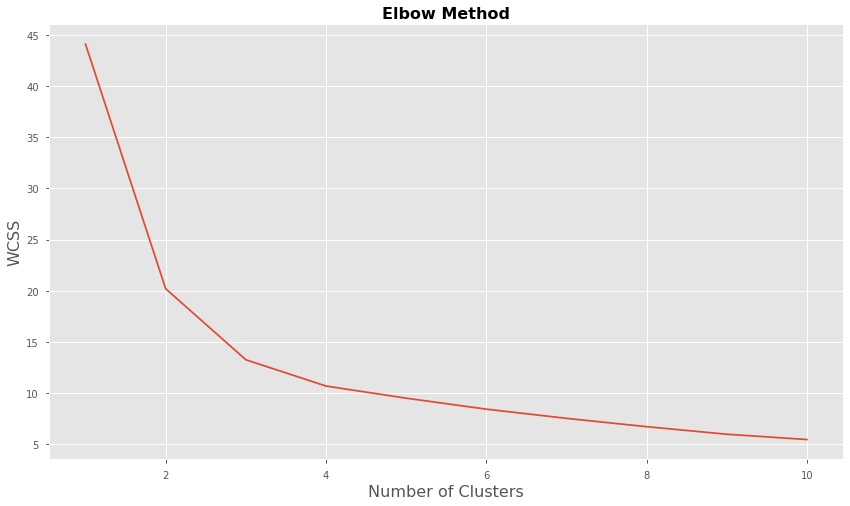

In [182]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
lbt('Number of Clusters', 'WCSS', 'Elbow Method')

In [183]:
# Treinando o modelo K-Means no conjunto de dados
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
km = kmeans.fit_predict(x)

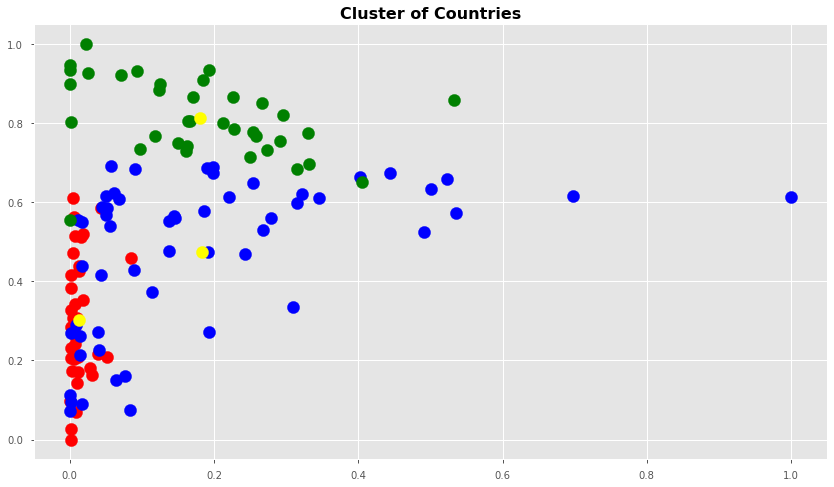

In [184]:
plt.scatter(x[km == 0, 0], x[km == 0, 1], s = 150, c = 'red', label = 'Group 1')
plt.scatter(x[km == 1, 0], x[km == 1, 1], s = 150, c = 'blue', label = 'Group 2')
plt.scatter(x[km == 2, 0], x[km == 2, 1], s = 150, c = 'green', label = 'Group 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centers')
lbt('', '', 'Cluster of Countries')

# 6. Deploy

Access the application at:
https://github.com/datacgi/covid-19-death-rate.

The complete analysis of the data is published in:
https://datacgi.medium.com/five-aspects-affecting-covid-19-death-rate-9f5758a62ef1